# Roller Coaster Data Exploration
## Complete Coaster Mapping Dataset Analysis

This notebook explores the complete_coaster_mapping.csv dataset containing roller coaster ratings and metadata.

**Goal:** Generate publication-ready visualizations for research reports.

In [54]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for publication-quality plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set figure DPI for high-quality images
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load and Inspect Data

In [55]:
# Load the dataset
data_path = Path('complete_coaster_mapping.csv')
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
print(f"\nColumns ({len(df.columns)}):")
print(df.columns.tolist())

Dataset shape: (1299, 37)

Columns (37):
['coaster_id', 'coaster_name', 'ratings_coaster', 'ratings_park', 'avg_rating', 'total_ratings', 'pct_0.5_stars', 'pct_1.0_stars', 'pct_1.5_stars', 'pct_2.0_stars', 'pct_2.5_stars', 'pct_3.0_stars', 'pct_3.5_stars', 'pct_4.0_stars', 'pct_4.5_stars', 'pct_5.0_stars', 'count_0.5_stars', 'count_1.0_stars', 'count_1.5_stars', 'count_2.0_stars', 'count_2.5_stars', 'count_3.0_stars', 'count_3.5_stars', 'count_4.0_stars', 'count_4.5_stars', 'count_5.0_stars', 'rfdb_park_folder', 'rfdb_coaster_folder', 'csv_count', 'full_path', 'coaster_similarity', 'park_similarity', 'combined_similarity', 'match_type', 'match_reason', 'url', 'scraped_at']


In [56]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,coaster_id,coaster_name,ratings_coaster,ratings_park,avg_rating,total_ratings,pct_0.5_stars,pct_1.0_stars,pct_1.5_stars,pct_2.0_stars,...,rfdb_coaster_folder,csv_count,full_path,coaster_similarity,park_similarity,combined_similarity,match_type,match_reason,url,scraped_at
0,2832,Zadra,Zadra,Energylandia,4.90,1480.0,0.14,0.20,0.14,0.07,...,zadra,1,rfdb_csvs\energylandia\zadra,100.0,100.0,100.0,perfect,coaster_name,https://captaincoaster.com/en/coasters/2832/za...,2025-11-11T16:23:17.373234
1,6301,AlpenFury,AlpenFury,Canada's Wonderland,4.88,211.0,0.47,NaN,NaN,NaN,...,alpenfury,5,rfdb_csvs\canadaswonderland\alpenfury,100.0,92.9,97.9,perfect,coaster_name,https://captaincoaster.com/en/coasters/6301/ca...,2025-11-11T16:33:11.236572
2,2827,Taiga,Taiga,Linnanmäki,4.87,315.0,0.32,NaN,NaN,0.32,...,taiga,4,rfdb_csvs\linnanmäki\taiga,100.0,100.0,100.0,perfect,coaster_name,https://captaincoaster.com/en/coasters/2827/ta...,2025-11-11T16:23:16.157046
3,3144,VelociCoaster,VelociCoaster,Universal Islands of Adventure,4.86,1585.0,0.38,0.06,0.19,0.25,...,velocicoaster,5,rfdb_csvs\universalstudiosislandsofadventure\v...,100.0,82.1,94.6,perfect,coaster_name,https://captaincoaster.com/en/coasters/3144/ve...,2025-11-11T16:25:07.505326
4,5521,Batman Gotham City Escape,Batman Gotham City Escape,Parque Warner Madrid,4.86,1031.0,0.19,0.19,NaN,0.39,...,batmangothamcityescape,5,rfdb_csvs\parquewarnermadrid\batmangothamcitye...,93.6,94.7,94.0,fuzzy,coaster_name,https://captaincoaster.com/en/coasters/5521/ba...,2025-11-11T16:30:26.924520


In [57]:
# Basic statistics
print("Dataset Info:")
df.info()

print("\n" + "="*50)
print("Numerical Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   coaster_id           1299 non-null   int64  
 1   coaster_name         1299 non-null   object 
 2   ratings_coaster      1299 non-null   object 
 3   ratings_park         1299 non-null   object 
 4   avg_rating           1298 non-null   float64
 5   total_ratings        1298 non-null   float64
 6   pct_0.5_stars        954 non-null    float64
 7   pct_1.0_stars        1054 non-null   float64
 8   pct_1.5_stars        1058 non-null   float64
 9   pct_2.0_stars        1162 non-null   float64
 10  pct_2.5_stars        1156 non-null   float64
 11  pct_3.0_stars        1186 non-null   float64
 12  pct_3.5_stars        1117 non-null   float64
 13  pct_4.0_stars        1049 non-null   float64
 14  pct_4.5_stars        830 non-null    float64
 15  pct_5.0_stars        106

,coaster_id,avg_rating,total_ratings,pct_0.5_stars,pct_1.0_stars,pct_1.5_stars,pct_2.0_stars,pct_2.5_stars,pct_3.0_stars,pct_3.5_stars,...,count_2.5_stars,count_3.0_stars,count_3.5_stars,count_4.0_stars,count_4.5_stars,count_5.0_stars,csv_count,coaster_similarity,park_similarity,combined_similarity
count,1299.000000,1298.000000,1298.000000,954.000000,1054.000000,1058.000000,1162.000000,1156.000000,1186.000000,1117.000000,...,1156.000000,1186.000000,1117.000000,1049.000000,830.000000,1063.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,2194.582756,2.761079,330.460709,10.443019,12.033444,9.610747,12.965172,11.871635,15.934528,13.715327,...,33.025952,51.819562,51.419875,64.159199,50.780723,58.960489,2.848345,83.917398,58.168822,76.191763
std,1775.639588,1.014342,505.583040,14.457045,13.311379,9.320726,9.914337,8.558828,10.612347,10.456311,...,59.366681,93.131708,95.141500,128.990023,107.764756,202.578571,1.676706,15.449517,34.824822,19.198052
min,1.000000,0.500000,1.000000,0.060000,0.050000,0.060000,0.070000,0.130000,0.180000,0.160000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48.500000,0.000000,42.000000
25%,708.000000,1.942500,41.000000,0.790000,1.470000,2.002500,4.267500,4.697500,6.702500,4.490000,...,4.000000,6.000000,4.000000,4.000000,2.000000,2.000000,1.000000,66.700000,25.000000,56.050000
50%,1985.000000,2.730000,146.000000,3.935000,7.020000,7.460000,11.530000,11.110000,14.590000,11.790000,...,13.000000,19.000000,16.000000,16.000000,8.000000,7.000000,2.000000,93.300000,47.800000,77.700000
75%,3081.500000,3.560000,401.000000,14.290000,18.757500,14.992500,20.000000,17.737500,23.800000,21.220000,...,36.000000,56.000000,54.000000,65.000000,45.000000,25.500000,5.000000,98.650000,94.100000,95.600000
max,6906.000000,4.900000,3539.000000,100.000000,100.000000,100.000000,55.560000,62.500000,100.000000,100.000000,...,580.000000,851.000000,879.000000,1197.000000,1070.000000,2588.000000,5.000000,100.000000,100.000000,100.000000


In [58]:
# Check for missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)

print("Missing Values:")
print(missing_df[missing_df['Missing Count'] > 0])

Missing Values:
                 Missing Count  Percentage
pct_4.5_stars              469   36.104696
count_4.5_stars            469   36.104696
count_0.5_stars            345   26.558891
pct_0.5_stars              345   26.558891
pct_4.0_stars              250   19.245574
count_4.0_stars            250   19.245574
count_1.0_stars            245   18.860662
pct_1.0_stars              245   18.860662
count_1.5_stars            241   18.552733
pct_1.5_stars              241   18.552733
count_5.0_stars            236   18.167821
pct_5.0_stars              236   18.167821
pct_3.5_stars              182   14.010778
count_3.5_stars            182   14.010778
pct_2.5_stars              143   11.008468
count_2.5_stars            143   11.008468
pct_2.0_stars              137   10.546574
count_2.0_stars            137   10.546574
count_3.0_stars            113    8.698999
pct_3.0_stars              113    8.698999
avg_rating                   1    0.076982
total_ratings                1    0.07

## 2. Rating Distribution Analysis

In [59]:
# Analyze average ratings
print("Average Rating Statistics:")
print(f"Mean: {df['avg_rating'].mean():.3f}")
print(f"Median: {df['avg_rating'].median():.3f}")
print(f"Std Dev: {df['avg_rating'].std():.3f}")
print(f"Min: {df['avg_rating'].min():.3f}")
print(f"Max: {df['avg_rating'].max():.3f}")
print(f"\nRating Range: {df['avg_rating'].min():.2f} - {df['avg_rating'].max():.2f}")

Average Rating Statistics:
Mean: 2.761
Median: 2.730
Std Dev: 1.014
Min: 0.500
Max: 4.900

Rating Range: 0.50 - 4.90


In [60]:
# Rating distribution by bins
rating_bins = pd.cut(df['avg_rating'], bins=[0, 1, 2, 3, 4, 5], labels=['1-2', '2-3', '3-4', '4-5', '5'])
rating_counts = rating_bins.value_counts().sort_index()

print("Rating Distribution:")
for rating, count in rating_counts.items():
    pct = (count / len(df)) * 100
    print(f"{rating}: {count:4d} ({pct:5.1f}%)")

Rating Distribution:
1-2:   28 (  2.2%)
2-3:  334 ( 25.7%)
3-4:  402 ( 30.9%)
4-5:  359 ( 27.6%)
5:  175 ( 13.5%)


## 3. Match Type Analysis

In [61]:
# Analyze match types
if 'match_type' in df.columns:
    match_counts = df['match_type'].value_counts()
    print("Match Type Distribution:")
    for match_type, count in match_counts.items():
        pct = (count / len(df)) * 100
        avg_rating = df[df['match_type'] == match_type]['avg_rating'].mean()
        print(f"{match_type:15s}: {count:4d} ({pct:5.1f}%) | Avg Rating: {avg_rating:.3f}")
else:
    print("No match_type column found")

Match Type Distribution:
fuzzy          :  781 ( 60.1%) | Avg Rating: 2.559
perfect        :  518 ( 39.9%) | Avg Rating: 3.066


## 4. Duplicate Coasters Analysis

In [62]:
# Check for duplicate coaster names
duplicates = df[df.duplicated('coaster_name', keep=False)].sort_values('coaster_name')
unique_coasters = df['coaster_name'].nunique()
total_entries = len(df)

print(f"Total entries: {total_entries}")
print(f"Unique coasters: {unique_coasters}")
print(f"Duplicate entries: {total_entries - unique_coasters}")
print(f"\nCoasters with multiple entries: {len(duplicates['coaster_name'].unique())}")

if len(duplicates) > 0:
    print("\nTop 10 coasters with most duplicates:")
    dup_counts = duplicates['coaster_name'].value_counts().head(10)
    for name, count in dup_counts.items():
        print(f"  {name}: {count} entries")

Total entries: 1299
Unique coasters: 1050
Duplicate entries: 249

Coasters with multiple entries: 116

Top 10 coasters with most duplicates:
  Boomerang: 13 entries
  Dragon: 11 entries
  Wild Mouse: 9 entries
  Wacky Worm: 9 entries
  Woodstock Express: 8 entries
  Crazy Mouse: 7 entries
  Cobra: 7 entries
  Sea Serpent: 7 entries
  Wildcat: 6 entries
  Corkscrew: 6 entries


## 5. Generate Report Visualizations

Creating publication-ready figures for the report.

In [63]:
# Create output directory for figures
output_dir = Path('report_figures')
output_dir.mkdir(exist_ok=True)
print(f"Saving figures to: {output_dir}")

Saving figures to: report_figures


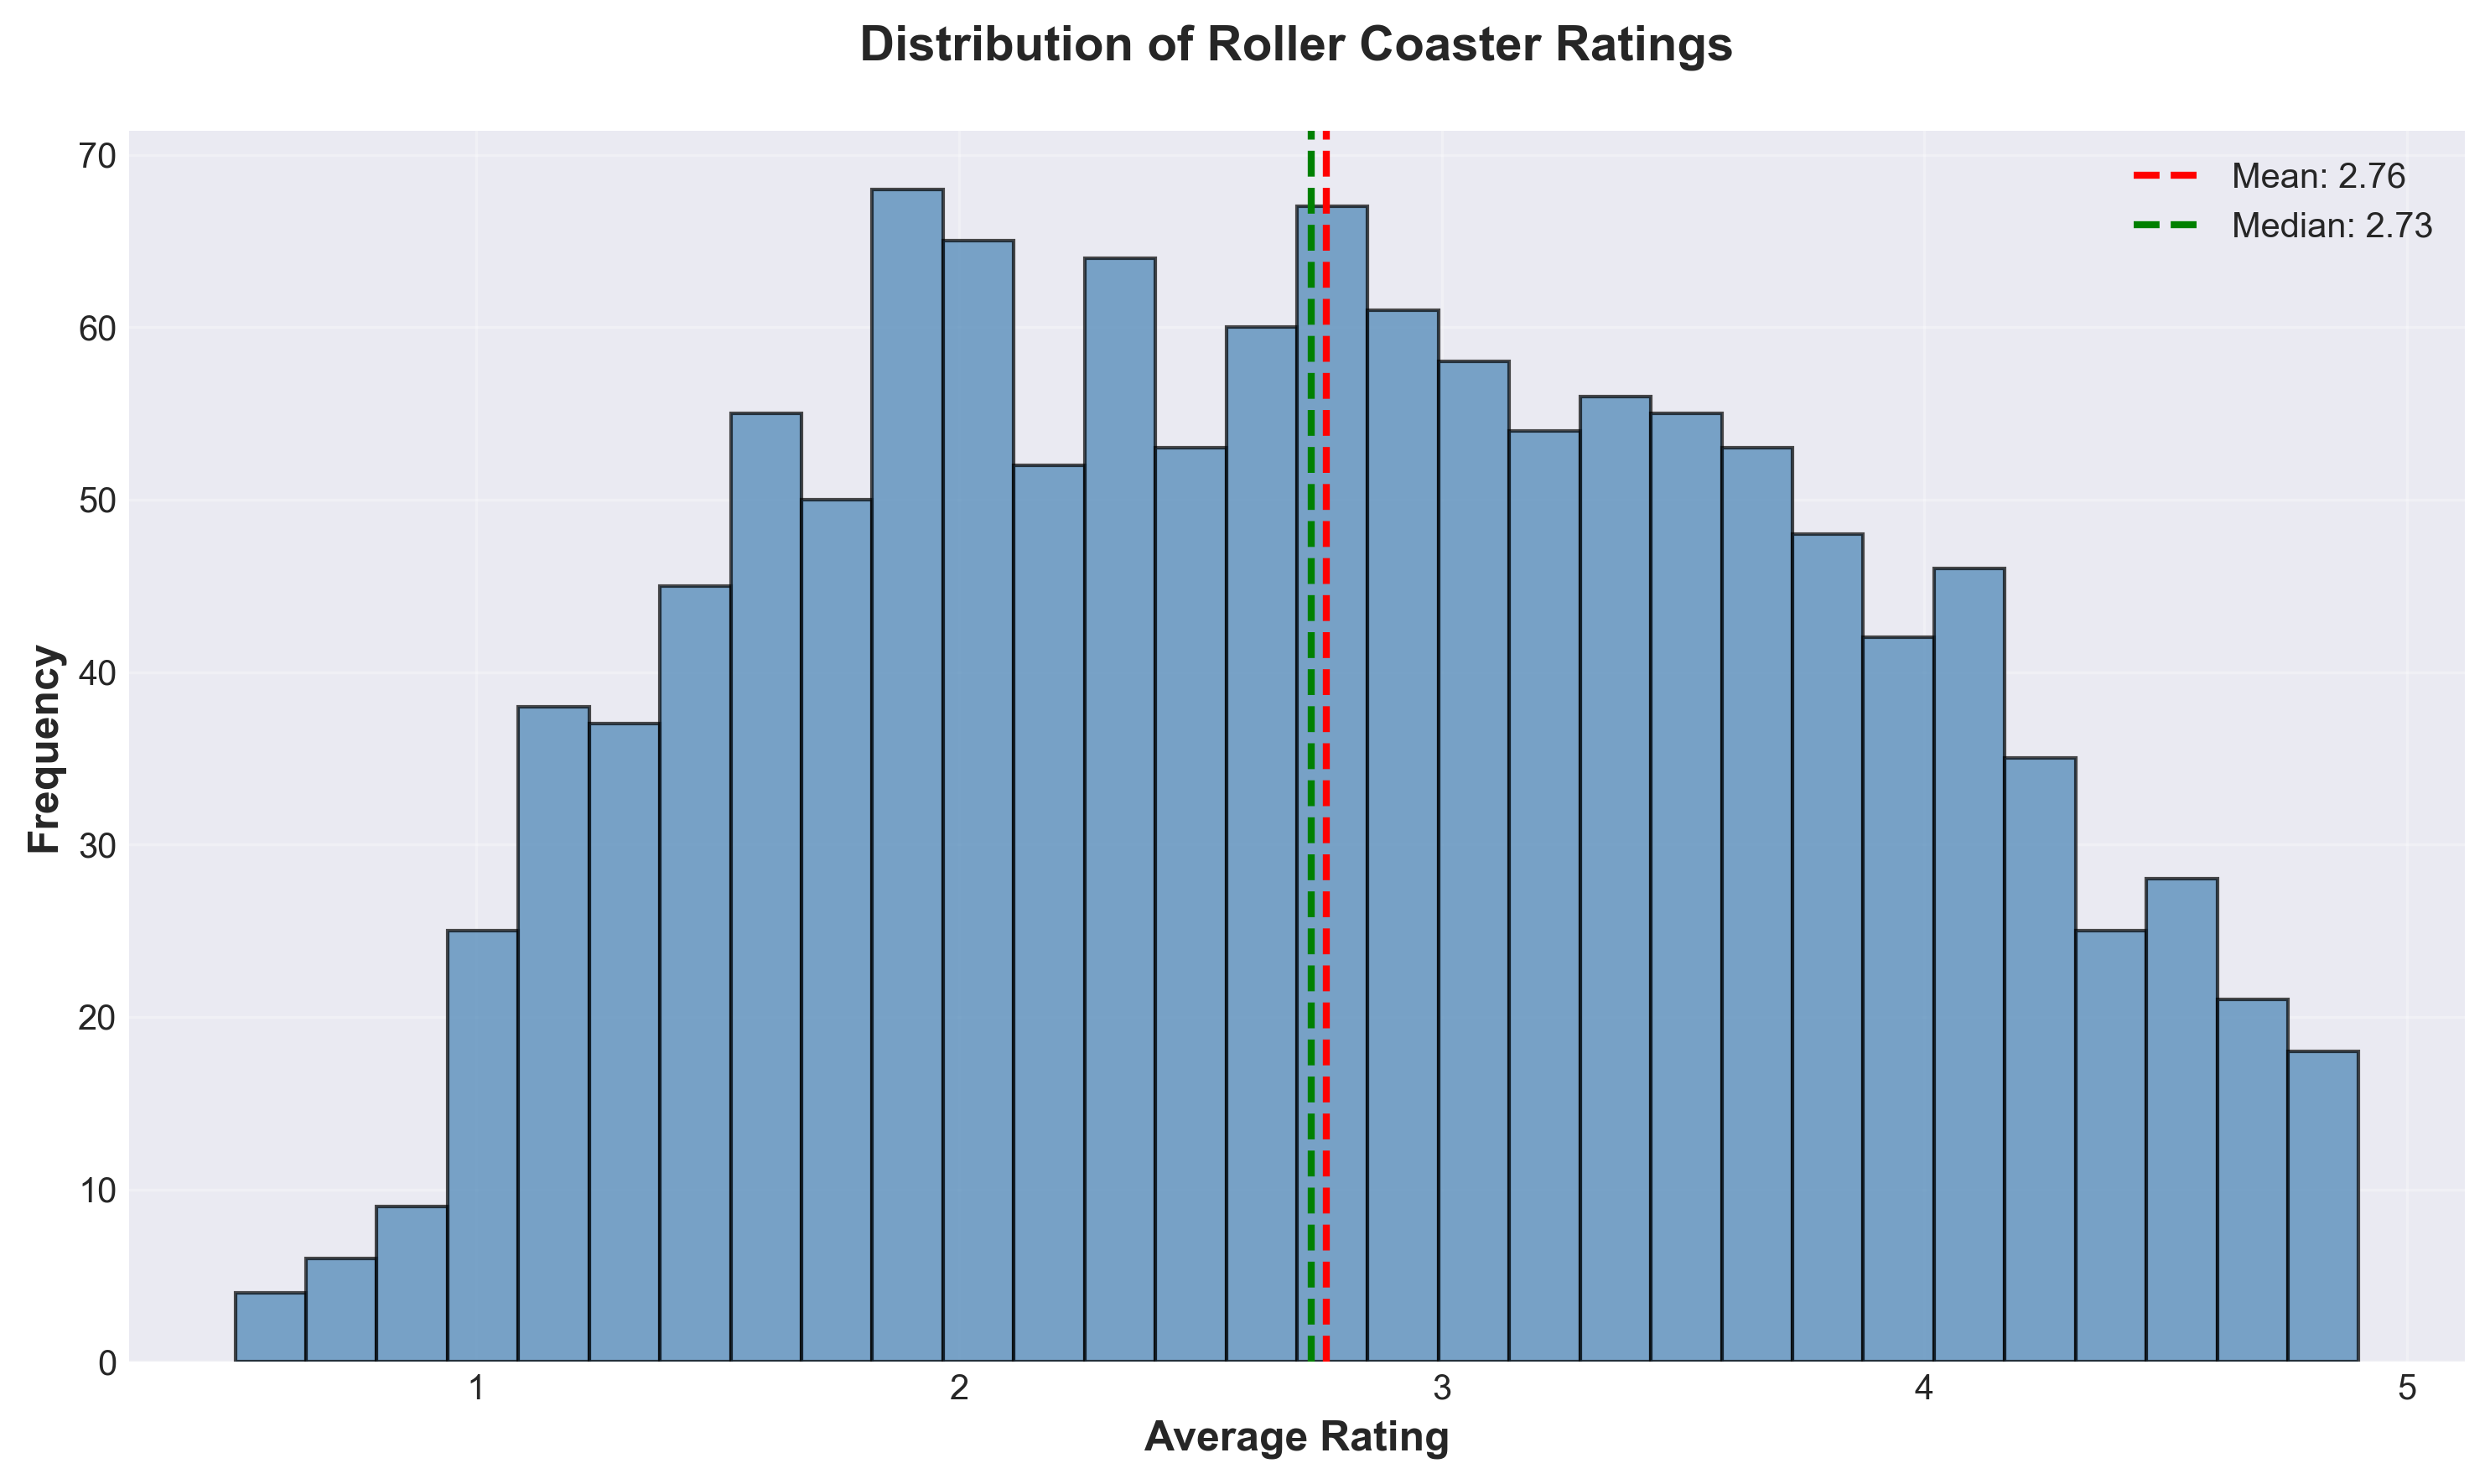

✓ Figure 1 saved: rating_distribution.png


In [64]:
# Figure 1: Rating Distribution Histogram
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df['avg_rating'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
ax.axvline(df['avg_rating'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["avg_rating"].mean():.2f}')
ax.axvline(df['avg_rating'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["avg_rating"].median():.2f}')

ax.set_xlabel('Average Rating', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Roller Coaster Ratings', fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'fig1_rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 1 saved: rating_distribution.png")

c:\Users\Lenovo\anaconda3\envs\rc\Lib\site-packages\numpy\linalg\_linalg.py:2431: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


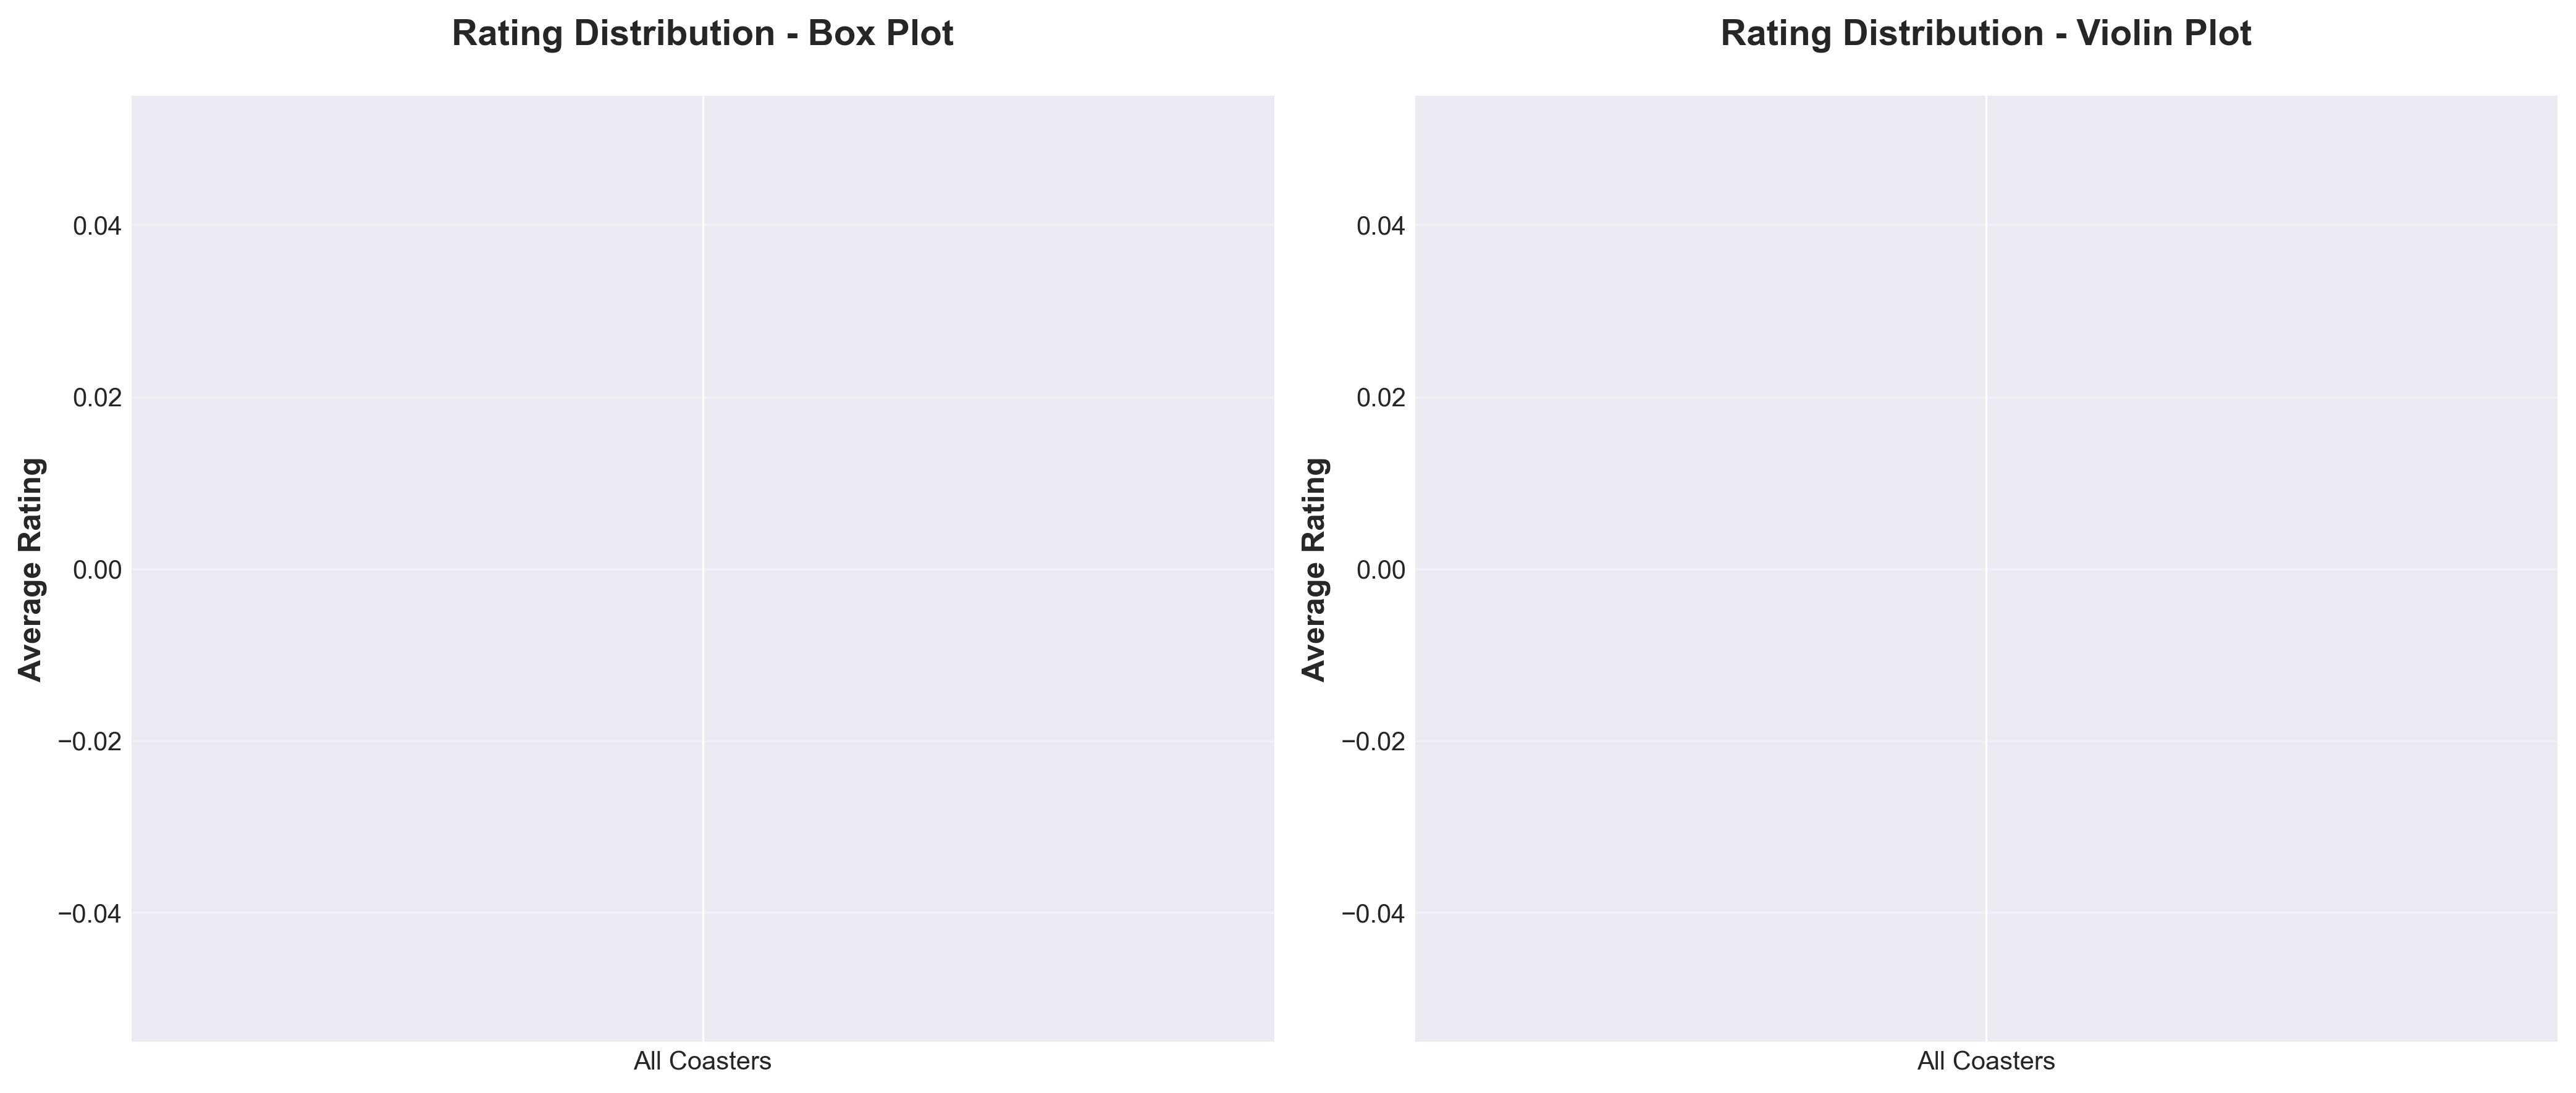

✓ Figure 2 saved: rating_boxplot_violin.png


In [65]:
# Figure 2: Rating Distribution Box Plot with Violin
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Box plot
bp = ax1.boxplot([df['avg_rating']], vert=True, patch_artist=True, widths=0.5)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][0].set_edgecolor('black')
bp['medians'][0].set_color('red')
bp['medians'][0].set_linewidth(2)

ax1.set_ylabel('Average Rating', fontsize=12, fontweight='bold')
ax1.set_title('Rating Distribution - Box Plot', fontsize=14, fontweight='bold', pad=20)
ax1.set_xticklabels(['All Coasters'])
ax1.grid(True, alpha=0.3, axis='y')

# Violin plot
parts = ax2.violinplot([df['avg_rating']], positions=[0], widths=0.7, showmeans=True, showmedians=True)
for pc in parts['bodies']:
    pc.set_facecolor('lightcoral')
    pc.set_alpha(0.7)

ax2.set_ylabel('Average Rating', fontsize=12, fontweight='bold')
ax2.set_title('Rating Distribution - Violin Plot', fontsize=14, fontweight='bold', pad=20)
ax2.set_xticks([0])
ax2.set_xticklabels(['All Coasters'])
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(output_dir / 'fig2_rating_boxplot_violin.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 2 saved: rating_boxplot_violin.png")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_48280\3186010096.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


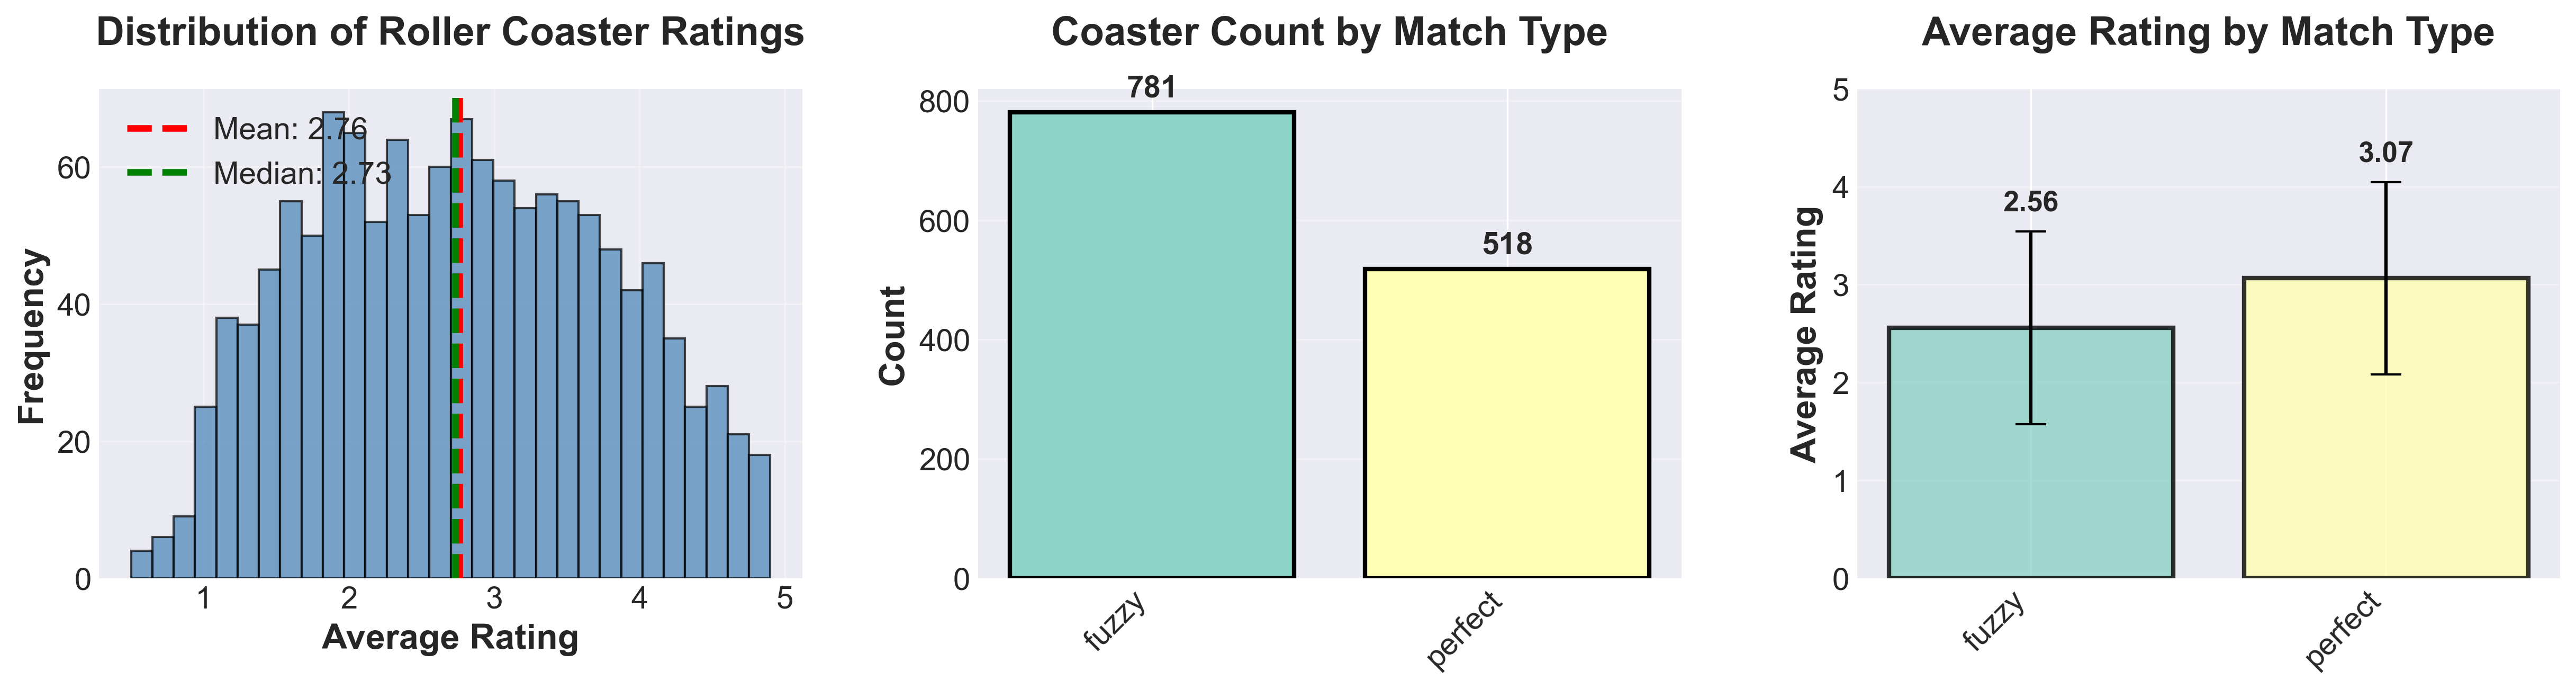

✓ Figure 3 saved: combined_rating_and_match_analysis.png


In [66]:
# Figure 3: Combined Rating Distribution and Match Type Analysis
fig = plt.figure(figsize=(20, 4))
gs = fig.add_gridspec(1, 3, hspace=0.3, wspace=0.25)

# Left: Rating Distribution Histogram
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(df['avg_rating'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(df['avg_rating'].mean(), color='red', linestyle='--', linewidth=3, 
            label=f'Mean: {df["avg_rating"].mean():.2f}')
ax1.axvline(df['avg_rating'].median(), color='green', linestyle='--', linewidth=3, 
            label=f'Median: {df["avg_rating"].median():.2f}')

ax1.set_xlabel('Average Rating', fontsize=16, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=16, fontweight='bold')
ax1.set_title('Distribution of Roller Coaster Ratings', fontsize=18, fontweight='bold', pad=20)
ax1.legend(fontsize=14, loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='both', which='major', labelsize=14)

# Middle: Count by Match Type
if 'match_type' in df.columns:
    ax2 = fig.add_subplot(gs[0, 1])
    match_counts = df['match_type'].value_counts()
    colors = plt.cm.Set3(range(len(match_counts)))
    ax2.bar(range(len(match_counts)), match_counts.values, color=colors, edgecolor='black', linewidth=2)
    ax2.set_xticks(range(len(match_counts)))
    ax2.set_xticklabels(match_counts.index, rotation=45, ha='right', fontsize=14)
    ax2.set_ylabel('Count', fontsize=16, fontweight='bold')
    ax2.set_title('Coaster Count by Match Type', fontsize=18, fontweight='bold', pad=20)
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.tick_params(axis='y', which='major', labelsize=14)
    
    # Add count labels on bars
    for i, (idx, count) in enumerate(match_counts.items()):
        ax2.text(i, count + 15, str(count), ha='center', va='bottom', 
                fontweight='bold', fontsize=14)
    
    # Right: Rating by Match Type
    ax3 = fig.add_subplot(gs[0, 2])
    match_ratings = df.groupby('match_type')['avg_rating'].agg(['mean', 'std'])
    ax3.bar(range(len(match_ratings)), match_ratings['mean'], yerr=match_ratings['std'], 
            color=colors, edgecolor='black', linewidth=2, capsize=7, alpha=0.8)
    ax3.set_xticks(range(len(match_ratings)))
    ax3.set_xticklabels(match_ratings.index, rotation=45, ha='right', fontsize=14)
    ax3.set_ylabel('Average Rating', fontsize=16, fontweight='bold')
    ax3.set_title('Average Rating by Match Type', fontsize=18, fontweight='bold', pad=20)
    ax3.grid(True, alpha=0.3, axis='y')
    ax3.set_ylim([0, 5])
    ax3.tick_params(axis='y', which='major', labelsize=14)
    
    # Add rating labels on bars
    for i, (idx, row) in enumerate(match_ratings.iterrows()):
        ax3.text(i, row['mean'] + row['std'] + 0.15, f"{row['mean']:.2f}", 
                ha='center', va='bottom', fontweight='bold', fontsize=13)

# Overall title
#fig.suptitle('Roller Coaster Ratings and Match Type Analysis', 
#             fontsize=22, fontweight='bold', y=0.98)

plt.tight_layout()
plt.savefig(output_dir / 'fig3_combined_rating_and_match_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 3 saved: combined_rating_and_match_analysis.png")


In [67]:
781+518

1299

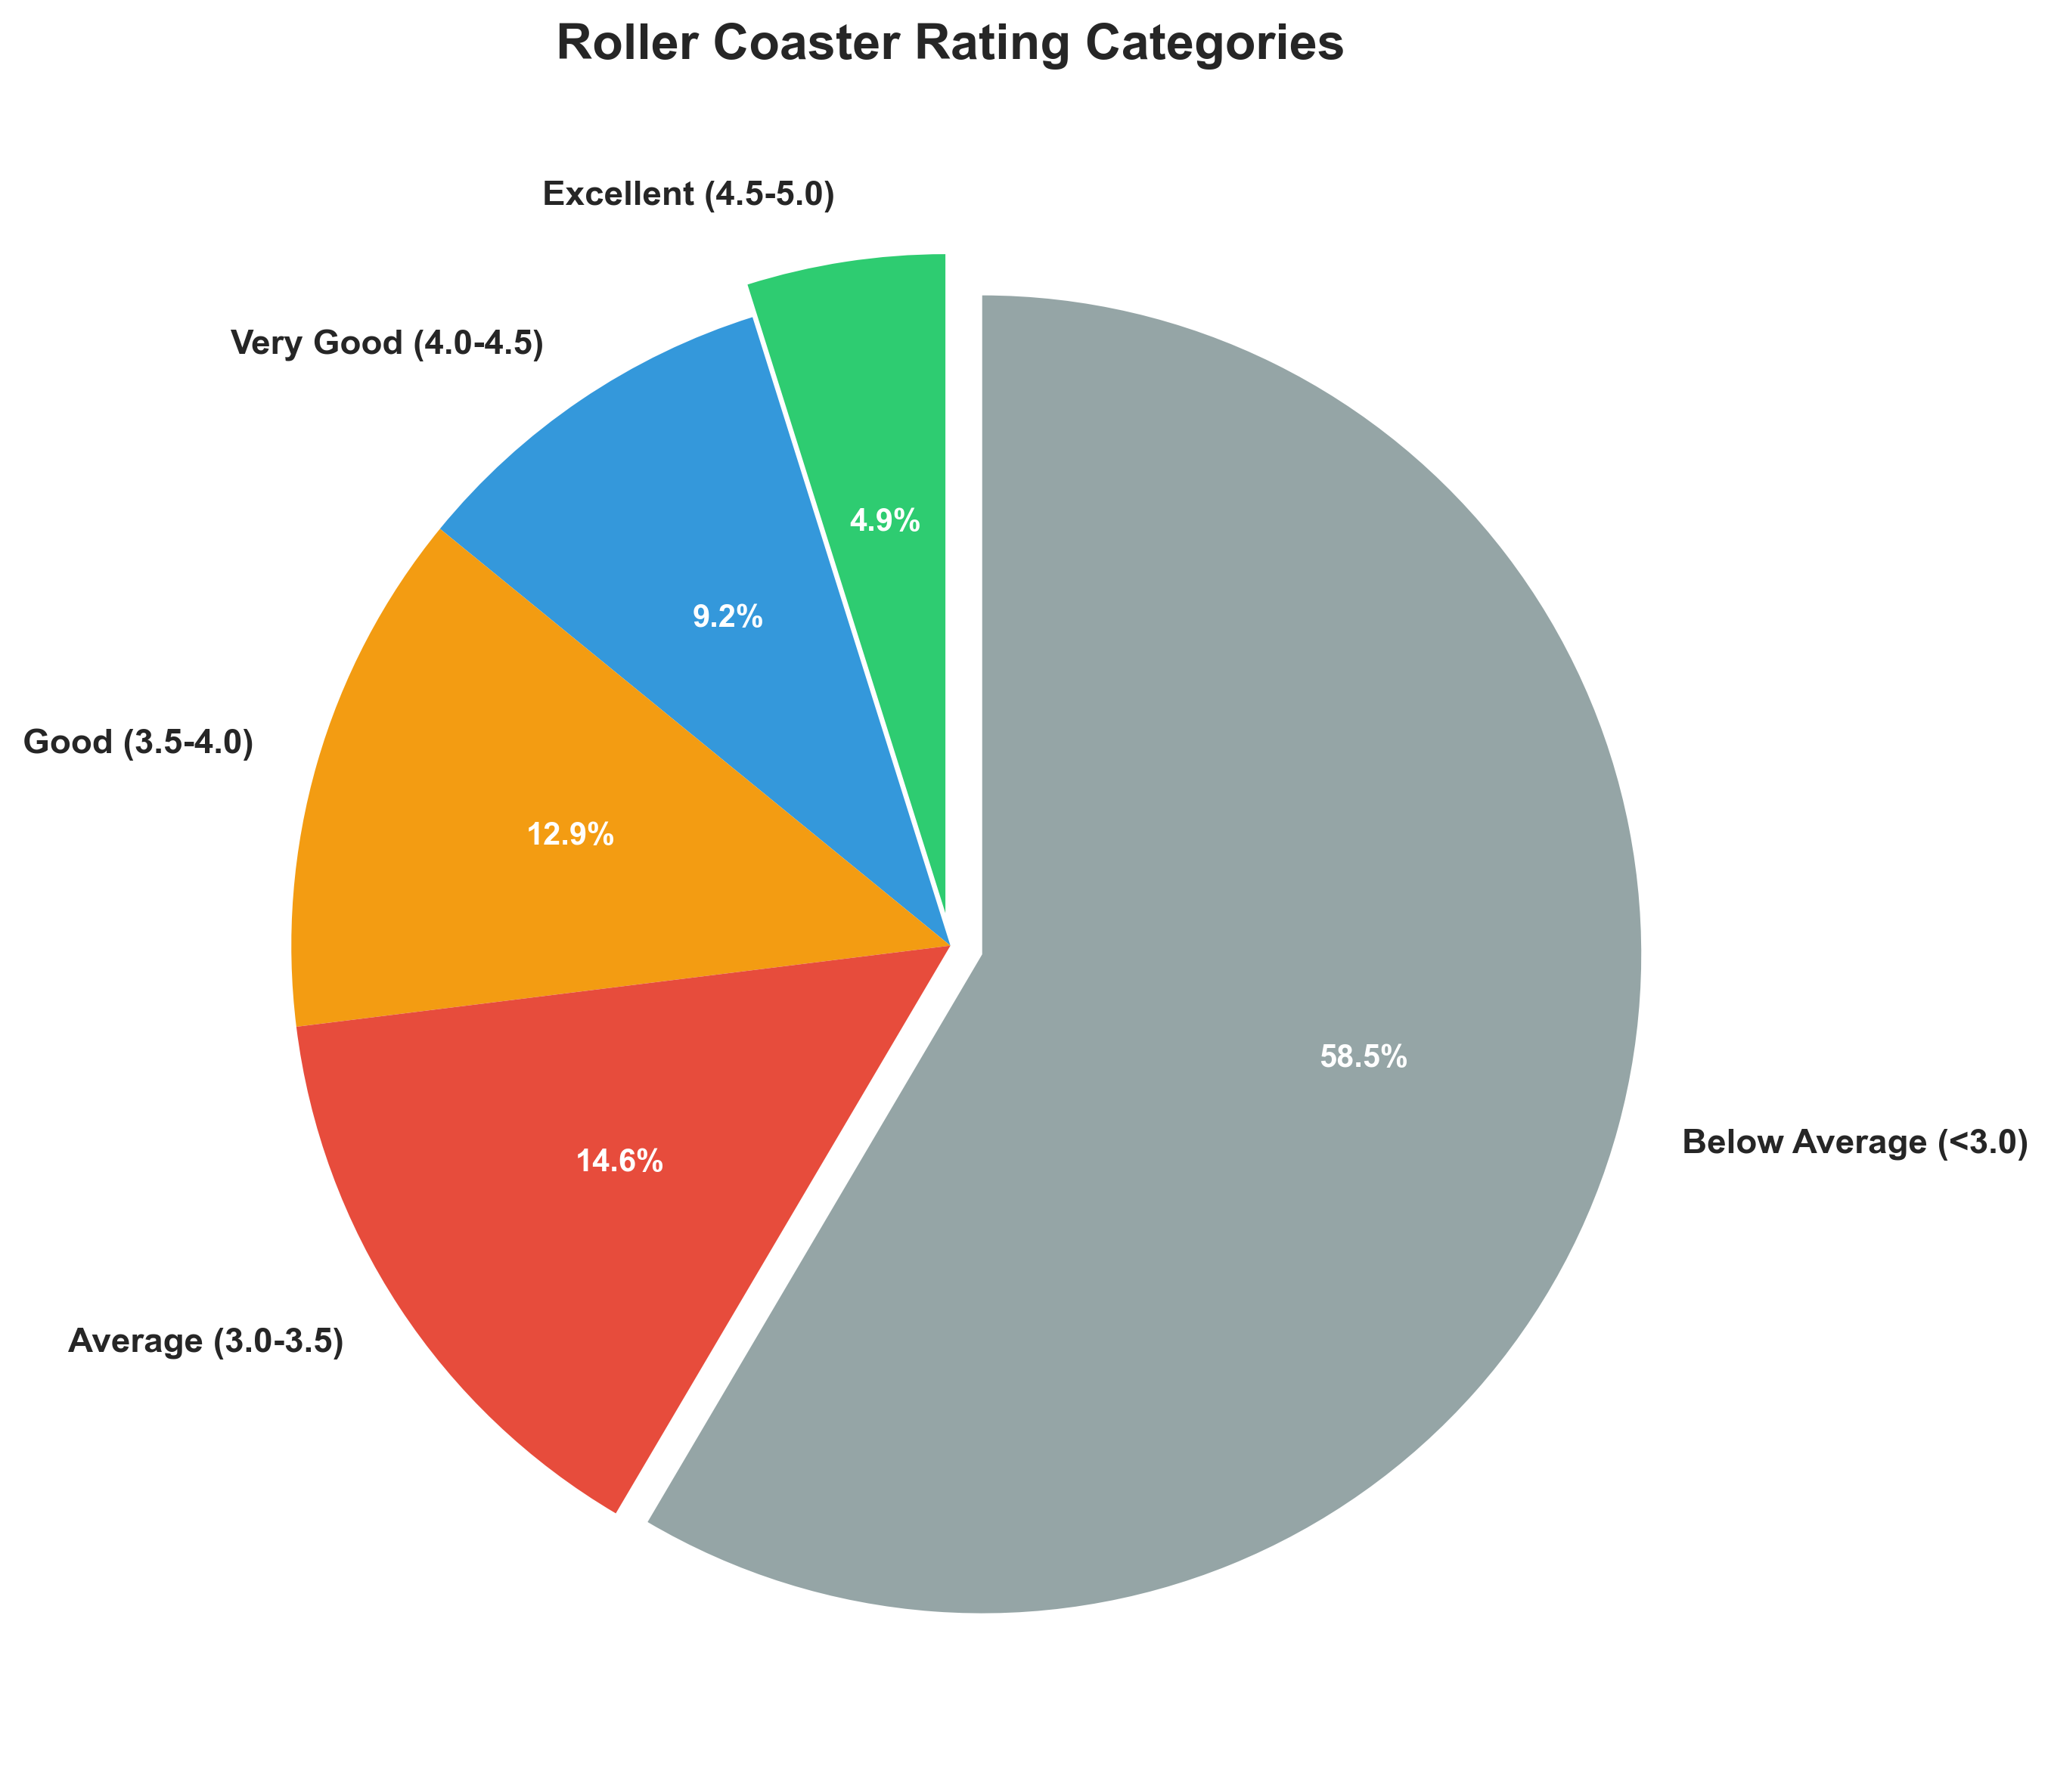

✓ Figure 4 saved: rating_categories_pie.png


In [68]:
# Figure 4: Rating Categories Pie Chart
fig, ax = plt.subplots(figsize=(10, 8))

# Define rating categories
categories = {
    'Excellent (4.5-5.0)': len(df[df['avg_rating'] >= 4.5]),
    'Very Good (4.0-4.5)': len(df[(df['avg_rating'] >= 4.0) & (df['avg_rating'] < 4.5)]),
    'Good (3.5-4.0)': len(df[(df['avg_rating'] >= 3.5) & (df['avg_rating'] < 4.0)]),
    'Average (3.0-3.5)': len(df[(df['avg_rating'] >= 3.0) & (df['avg_rating'] < 3.5)]),
    'Below Average (<3.0)': len(df[df['avg_rating'] < 3.0])
}

colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c', '#95a5a6']
explode = (0.05, 0, 0, 0, 0.05)  # Explode excellent and poor ratings

wedges, texts, autotexts = ax.pie(categories.values(), labels=categories.keys(), autopct='%1.1f%%',
                                    colors=colors, explode=explode, startangle=90,
                                    textprops={'fontsize': 11, 'fontweight': 'bold'})

# Make percentage text more readable
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

ax.set_title('Roller Coaster Rating Categories', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig(output_dir / 'fig4_rating_categories_pie.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 4 saved: rating_categories_pie.png")

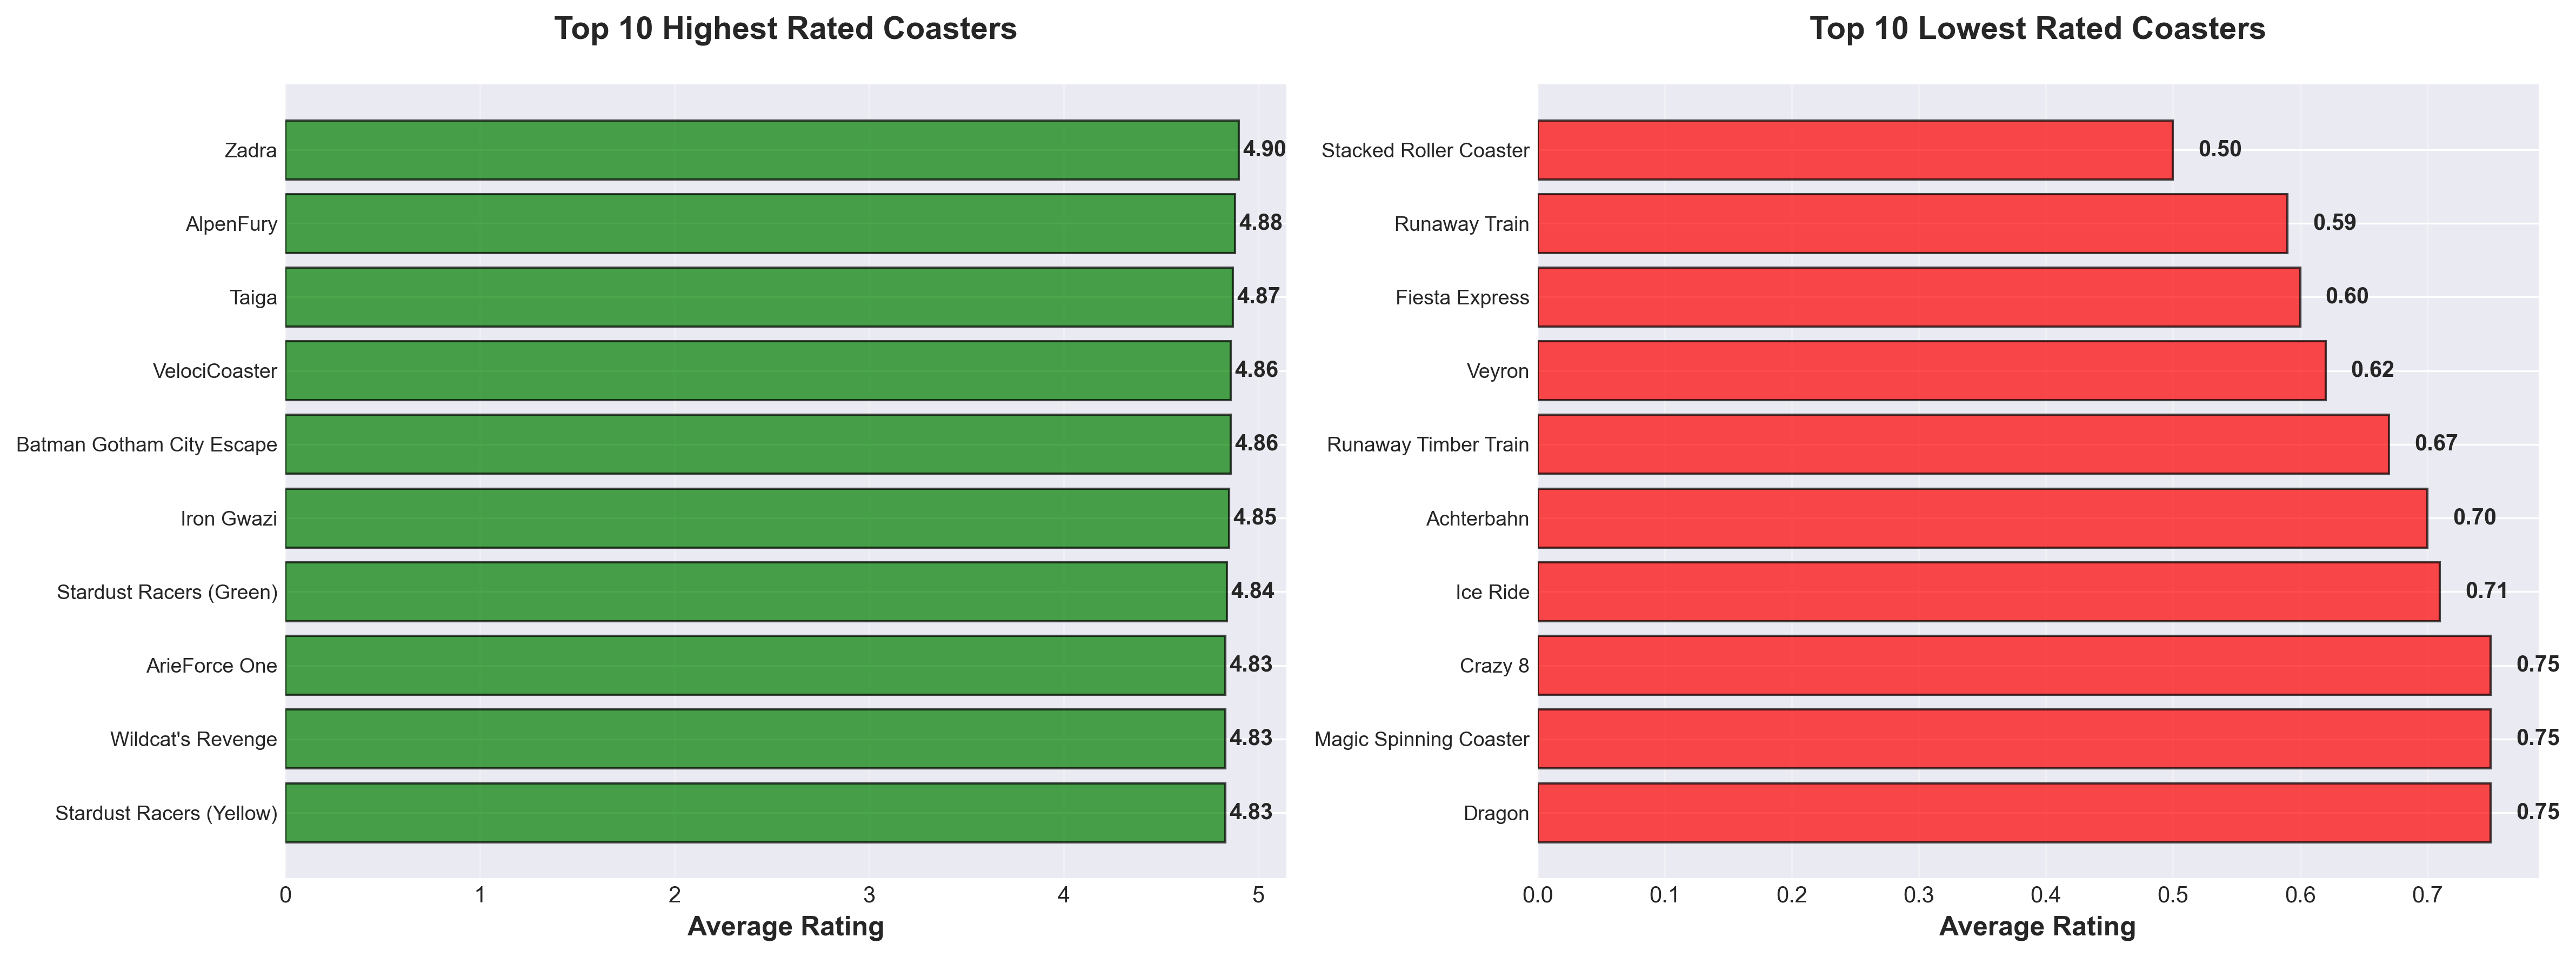

✓ Figure 5 saved: top_bottom_coasters.png


In [69]:
# Figure 5: Top and Bottom Rated Coasters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 rated coasters
top_10 = df.nlargest(10, 'avg_rating')[['coaster_name', 'avg_rating']]
y_pos = np.arange(len(top_10))
ax1.barh(y_pos, top_10['avg_rating'].values, color='green', alpha=0.7, edgecolor='black')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(top_10['coaster_name'].values, fontsize=9)
ax1.set_xlabel('Average Rating', fontsize=12, fontweight='bold')
ax1.set_title('Top 10 Highest Rated Coasters', fontsize=14, fontweight='bold', pad=20)
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3, axis='x')

# Add rating values on bars
for i, rating in enumerate(top_10['avg_rating'].values):
    ax1.text(rating + 0.02, i, f'{rating:.2f}', va='center', fontweight='bold')

# Bottom 10 rated coasters
bottom_10 = df.nsmallest(10, 'avg_rating')[['coaster_name', 'avg_rating']]
y_pos = np.arange(len(bottom_10))
ax2.barh(y_pos, bottom_10['avg_rating'].values, color='red', alpha=0.7, edgecolor='black')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(bottom_10['coaster_name'].values, fontsize=9)
ax2.set_xlabel('Average Rating', fontsize=12, fontweight='bold')
ax2.set_title('Top 10 Lowest Rated Coasters', fontsize=14, fontweight='bold', pad=20)
ax2.invert_yaxis()
ax2.grid(True, alpha=0.3, axis='x')

# Add rating values on bars
for i, rating in enumerate(bottom_10['avg_rating'].values):
    ax2.text(rating + 0.02, i, f'{rating:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig(output_dir / 'fig5_top_bottom_coasters.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 5 saved: top_bottom_coasters.png")

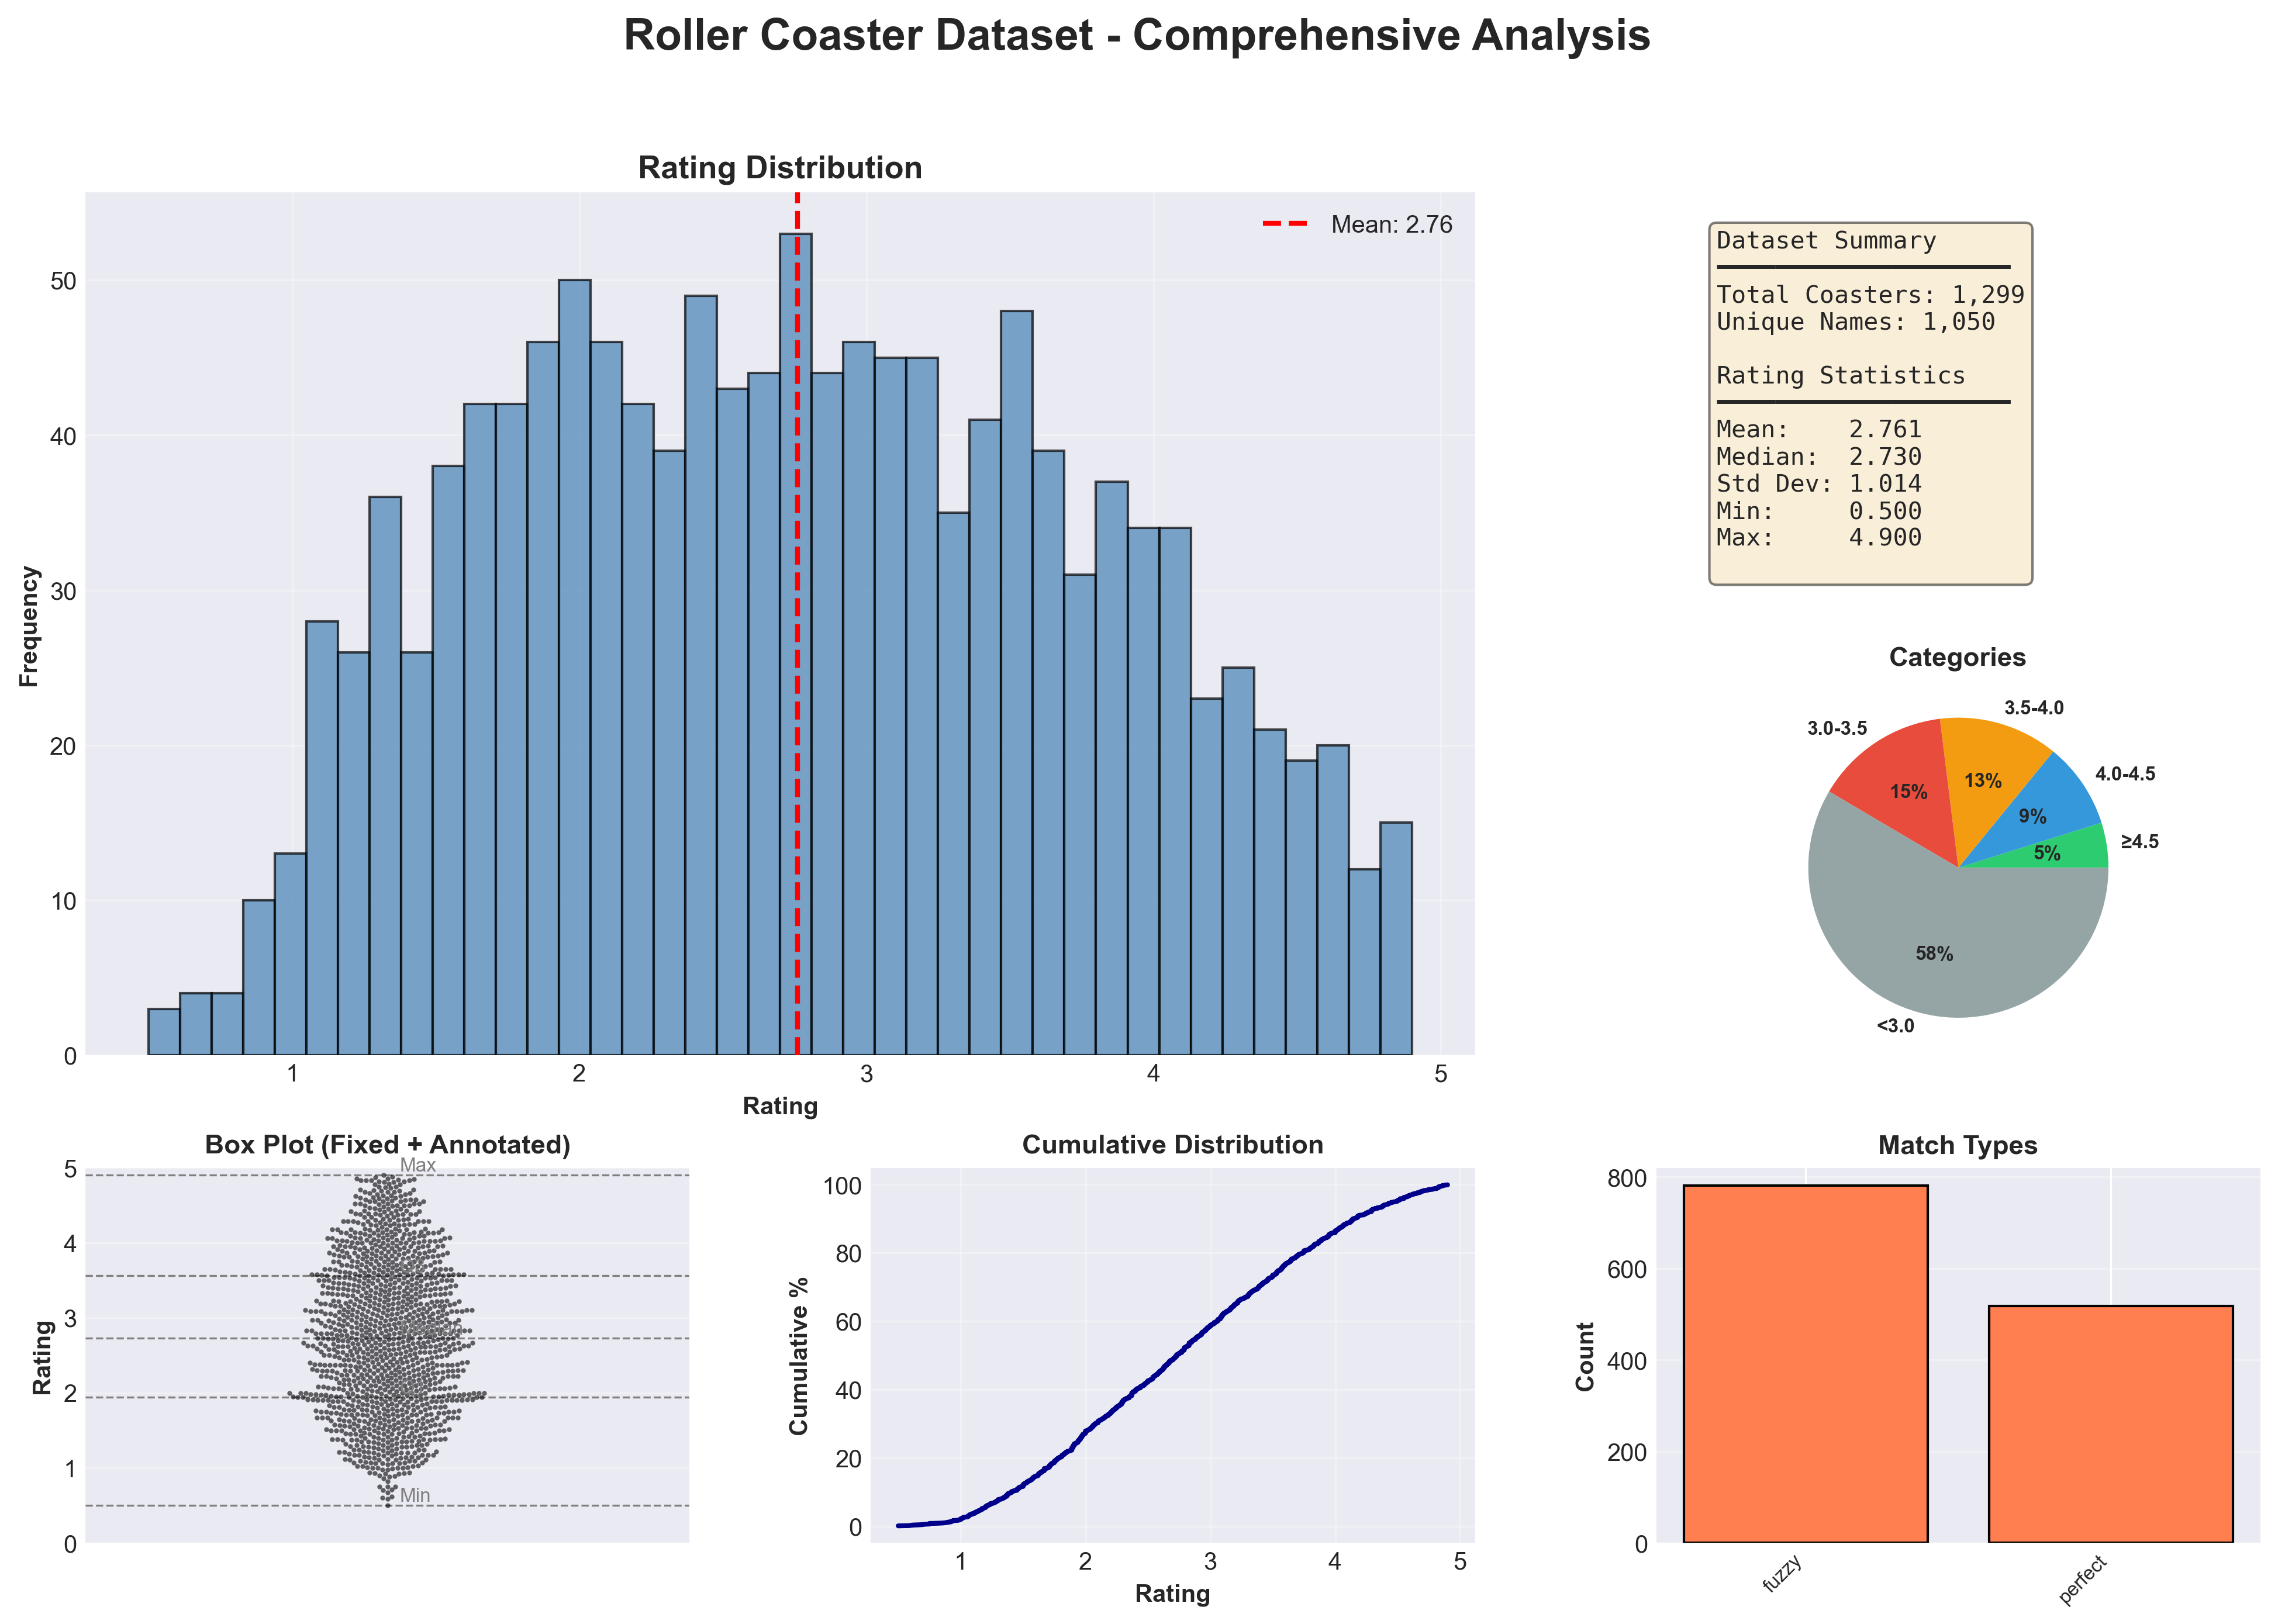

✓ Figure 6 saved: comprehensive_dashboard.png


In [70]:
# Figure 6: Comprehensive Summary Dashboard
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Rating distribution (large)
ax1 = fig.add_subplot(gs[0:2, 0:2])
ax1.hist(df['avg_rating'], bins=40, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(df['avg_rating'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["avg_rating"].mean():.2f}')
ax1.set_xlabel('Rating', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('Rating Distribution', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Summary statistics (text box)
ax2 = fig.add_subplot(gs[0, 2])
ax2.axis('off')
stats_text = f"""Dataset Summary
━━━━━━━━━━━━━━━━━━━━
Total Coasters: {len(df):,}
Unique Names: {df['coaster_name'].nunique():,}

Rating Statistics
━━━━━━━━━━━━━━━━━━━━
Mean:    {df['avg_rating'].mean():.3f}
Median:  {df['avg_rating'].median():.3f}
Std Dev: {df['avg_rating'].std():.3f}
Min:     {df['avg_rating'].min():.3f}
Max:     {df['avg_rating'].max():.3f}
"""
ax2.text(0.1, 0.9, stats_text, transform=ax2.transAxes, fontsize=10,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 3. Rating categories pie
ax3 = fig.add_subplot(gs[1, 2])
categories = {
    '≥4.5': len(df[df['avg_rating'] >= 4.5]),
    '4.0-4.5': len(df[(df['avg_rating'] >= 4.0) & (df['avg_rating'] < 4.5)]),
    '3.5-4.0': len(df[(df['avg_rating'] >= 3.5) & (df['avg_rating'] < 4.0)]),
    '3.0-3.5': len(df[(df['avg_rating'] >= 3.0) & (df['avg_rating'] < 3.5)]),
    '<3.0': len(df[df['avg_rating'] < 3.0])
}
colors_pie = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c', '#95a5a6']
ax3.pie(categories.values(), labels=categories.keys(), autopct='%1.0f%%',
        colors=colors_pie, textprops={'fontsize': 8, 'fontweight': 'bold'})
ax3.set_title('Categories', fontsize=11, fontweight='bold')

# 4. Fixed box plot with annotations and swarm overlay
ax4 = fig.add_subplot(gs[2, 0])
# Core boxplot with robust settings
bp = ax4.boxplot([df['avg_rating']], vert=True, patch_artist=True, widths=0.5,
                 notch=True, whis=1.5, showfliers=False)
# Styling
bp['boxes'][0].set_facecolor('#ADD8E6')
bp['boxes'][0].set_edgecolor('black')
for key in ['medians', 'caps', 'whiskers']:
    for artist in bp[key]:
        artist.set_color('black')
        artist.set_linewidth(1.2)

# Swarm overlay for granular distribution (ensure x length matches y)
try:
    import seaborn as sns
    sns.swarmplot(x=np.repeat('All', len(df['avg_rating'])), y=df['avg_rating'], ax=ax4, size=2, color='black', alpha=0.6)
except Exception:
    pass

# Quartile and whisker annotations
q1, q2, q3 = np.percentile(df['avg_rating'].dropna(), [25, 50, 75])
min_v = df['avg_rating'].min()
max_v = df['avg_rating'].max()
for val, label in [(q1,'Q1'), (q2,'Median'), (q3,'Q3'), (min_v,'Min'), (max_v,'Max')]:
    ax4.axhline(val, color='gray', linestyle='--', linewidth=0.8)
    ax4.text(0.02, val, label, va='bottom', ha='left', fontsize=8, color='gray')

ax4.set_ylabel('Rating', fontweight='bold')
ax4.set_title('Box Plot (Fixed + Annotated)', fontsize=11, fontweight='bold')
ax4.set_xticklabels(['All'])
ax4.set_ylim([0, 5])
ax4.grid(True, alpha=0.3, axis='y')

# 5. Cumulative distribution
ax5 = fig.add_subplot(gs[2, 1])
sorted_ratings = np.sort(df['avg_rating'])
cumulative = np.arange(1, len(sorted_ratings) + 1) / len(sorted_ratings) * 100
ax5.plot(sorted_ratings, cumulative, linewidth=2, color='darkblue')
ax5.set_xlabel('Rating', fontweight='bold')
ax5.set_ylabel('Cumulative %', fontweight='bold')
ax5.set_title('Cumulative Distribution', fontsize=11, fontweight='bold')
ax5.grid(True, alpha=0.3)

# 6. Match type distribution
if 'match_type' in df.columns:
    ax6 = fig.add_subplot(gs[2, 2])
    match_counts = df['match_type'].value_counts()
    ax6.bar(range(len(match_counts)), match_counts.values, color='coral', edgecolor='black')
    ax6.set_xticks(range(len(match_counts)))
    ax6.set_xticklabels(match_counts.index, rotation=45, ha='right', fontsize=8)
    ax6.set_ylabel('Count', fontweight='bold')
    ax6.set_title('Match Types', fontsize=11, fontweight='bold')
    ax6.grid(True, alpha=0.3, axis='y')

# Main title
fig.suptitle('Roller Coaster Dataset - Comprehensive Analysis', 
             fontsize=18, fontweight='bold', y=0.98)

plt.savefig(output_dir / 'fig6_comprehensive_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 6 saved: comprehensive_dashboard.png")

## 6. Additional Insights

In [71]:
# Analyze rating variance for duplicates
if df['coaster_name'].nunique() < len(df):
    print("Analyzing rating variance for coasters with multiple entries:\n")
    
    duplicates_analysis = df[df.duplicated('coaster_name', keep=False)].groupby('coaster_name')['avg_rating'].agg([
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std'),
        ('min', 'min'),
        ('max', 'max'),
        ('range', lambda x: x.max() - x.min())
    ]).sort_values('range', ascending=False)
    
    print("Top 10 coasters with highest rating variance:")
    print(duplicates_analysis.head(10))
    
    print(f"\nAverage rating range for duplicates: {duplicates_analysis['range'].mean():.3f}")
    print(f"Maximum rating range: {duplicates_analysis['range'].max():.3f}")

Analyzing rating variance for coasters with multiple entries:

Top 10 coasters with highest rating variance:
                 count      mean       std   min   max  range
coaster_name                                                 
Draken               2  2.660000  2.149605  1.14  4.18   3.04
Nitro                2  2.915000  1.944544  1.54  4.29   2.75
Orient Express       3  2.356667  1.360527  1.21  3.86   2.65
Flight Deck          2  2.655000  1.831407  1.36  3.95   2.59
Anaconda             3  2.843333  1.333504  1.99  4.38   2.39
Cyclone              6  2.593333  0.814633  1.53  3.83   2.30
Vampire              3  2.730000  1.145949  1.49  3.75   2.26
Goliath              6  3.801667  0.846579  2.21  4.44   2.23
Speedy Gonzales      2  2.420000  1.527351  1.34  3.50   2.16
Bandit               2  2.505000  1.520280  1.43  3.58   2.15

Average rating range for duplicates: 0.879
Maximum rating range: 3.040


In [72]:
# Percentile analysis
print("Rating Percentiles:")
percentiles = [10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    value = np.percentile(df['avg_rating'], p)
    print(f"  {p}th percentile: {value:.3f}")

Rating Percentiles:
  10th percentile: nan
  25th percentile: nan
  50th percentile: nan
  75th percentile: nan
  90th percentile: nan
  95th percentile: nan
  99th percentile: nan


## 7. Export Summary Report

In [73]:
# Generate text summary report
report = f"""
ROLLER COASTER DATASET ANALYSIS REPORT
{'='*60}

Dataset: complete_coaster_mapping.csv
Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}

DATASET OVERVIEW
{'-'*60}
Total entries:        {len(df):,}
Unique coasters:      {df['coaster_name'].nunique():,}
Duplicate entries:    {len(df) - df['coaster_name'].nunique():,}
Number of columns:    {len(df.columns)}

RATING STATISTICS
{'-'*60}
Mean rating:          {df['avg_rating'].mean():.4f}
Median rating:        {df['avg_rating'].median():.4f}
Standard deviation:   {df['avg_rating'].std():.4f}
Minimum rating:       {df['avg_rating'].min():.4f}
Maximum rating:       {df['avg_rating'].max():.4f}
Rating range:         {df['avg_rating'].max() - df['avg_rating'].min():.4f}

RATING DISTRIBUTION
{'-'*60}
"""

# Add rating category counts
categories = {
    'Excellent (4.5-5.0)': len(df[df['avg_rating'] >= 4.5]),
    'Very Good (4.0-4.5)': len(df[(df['avg_rating'] >= 4.0) & (df['avg_rating'] < 4.5)]),
    'Good (3.5-4.0)': len(df[(df['avg_rating'] >= 3.5) & (df['avg_rating'] < 4.0)]),
    'Average (3.0-3.5)': len(df[(df['avg_rating'] >= 3.0) & (df['avg_rating'] < 3.5)]),
    'Below Average (<3.0)': len(df[df['avg_rating'] < 3.0])
}

for category, count in categories.items():
    pct = (count / len(df)) * 100
    report += f"{category:25s}: {count:4d} ({pct:5.1f}%)\n"

if 'match_type' in df.columns:
    report += f"\nMATCH TYPE DISTRIBUTION\n{'-'*60}\n"
    for match_type, count in df['match_type'].value_counts().items():
        pct = (count / len(df)) * 100
        avg_rating = df[df['match_type'] == match_type]['avg_rating'].mean()
        report += f"{match_type:15s}: {count:4d} ({pct:5.1f}%) | Avg Rating: {avg_rating:.3f}\n"

report += f"\n{'='*60}\n"
report += f"Report generated successfully\n"
report += f"Figures saved to: {output_dir.absolute()}\n"
report += f"{'='*60}\n"

# Save report to file
report_path = output_dir / 'analysis_report.txt'
with open(report_path, 'w') as f:
    f.write(report)

print(report)
print(f"\n✓ Text report saved to: {report_path}")


ROLLER COASTER DATASET ANALYSIS REPORT

Dataset: complete_coaster_mapping.csv
Date: 2025-12-03 22:30:49

DATASET OVERVIEW
------------------------------------------------------------
Total entries:        1,299
Unique coasters:      1,050
Duplicate entries:    249
Number of columns:    37

RATING STATISTICS
------------------------------------------------------------
Mean rating:          2.7611
Median rating:        2.7300
Standard deviation:   1.0143
Minimum rating:       0.5000
Maximum rating:       4.9000
Rating range:         4.4000

RATING DISTRIBUTION
------------------------------------------------------------
Excellent (4.5-5.0)      :   63 (  4.8%)
Very Good (4.0-4.5)      :  120 (  9.2%)
Good (3.5-4.0)           :  167 ( 12.9%)
Average (3.0-3.5)        :  189 ( 14.5%)
Below Average (<3.0)     :  759 ( 58.4%)

MATCH TYPE DISTRIBUTION
------------------------------------------------------------
fuzzy          :  781 ( 60.1%) | Avg Rating: 2.559
perfect        :  518 ( 39.9%) 

In [74]:
# List all generated figures
print("\n" + "="*60)
print("GENERATED FIGURES FOR REPORT")
print("="*60)

figures = list(output_dir.glob('*.png'))
for i, fig_path in enumerate(sorted(figures), 1):
    print(f"{i}. {fig_path.name}")

print(f"\nTotal: {len(figures)} figures")
print(f"Location: {output_dir.absolute()}")
print("\nAll figures are saved at 300 DPI for publication quality.")
print("="*60)


GENERATED FIGURES FOR REPORT
1. fig1_rating_distribution.png
2. fig2_rating_boxplot_violin.png
3. fig3_combined_rating_and_match_analysis.png
4. fig3_match_type_analysis.png
5. fig4_rating_categories_pie.png
6. fig5_top_bottom_coasters.png
7. fig6_comprehensive_dashboard.png

Total: 7 figures
Location: c:\Users\Lenovo\rollercoaster\ratings_data\report_figures

All figures are saved at 300 DPI for publication quality.


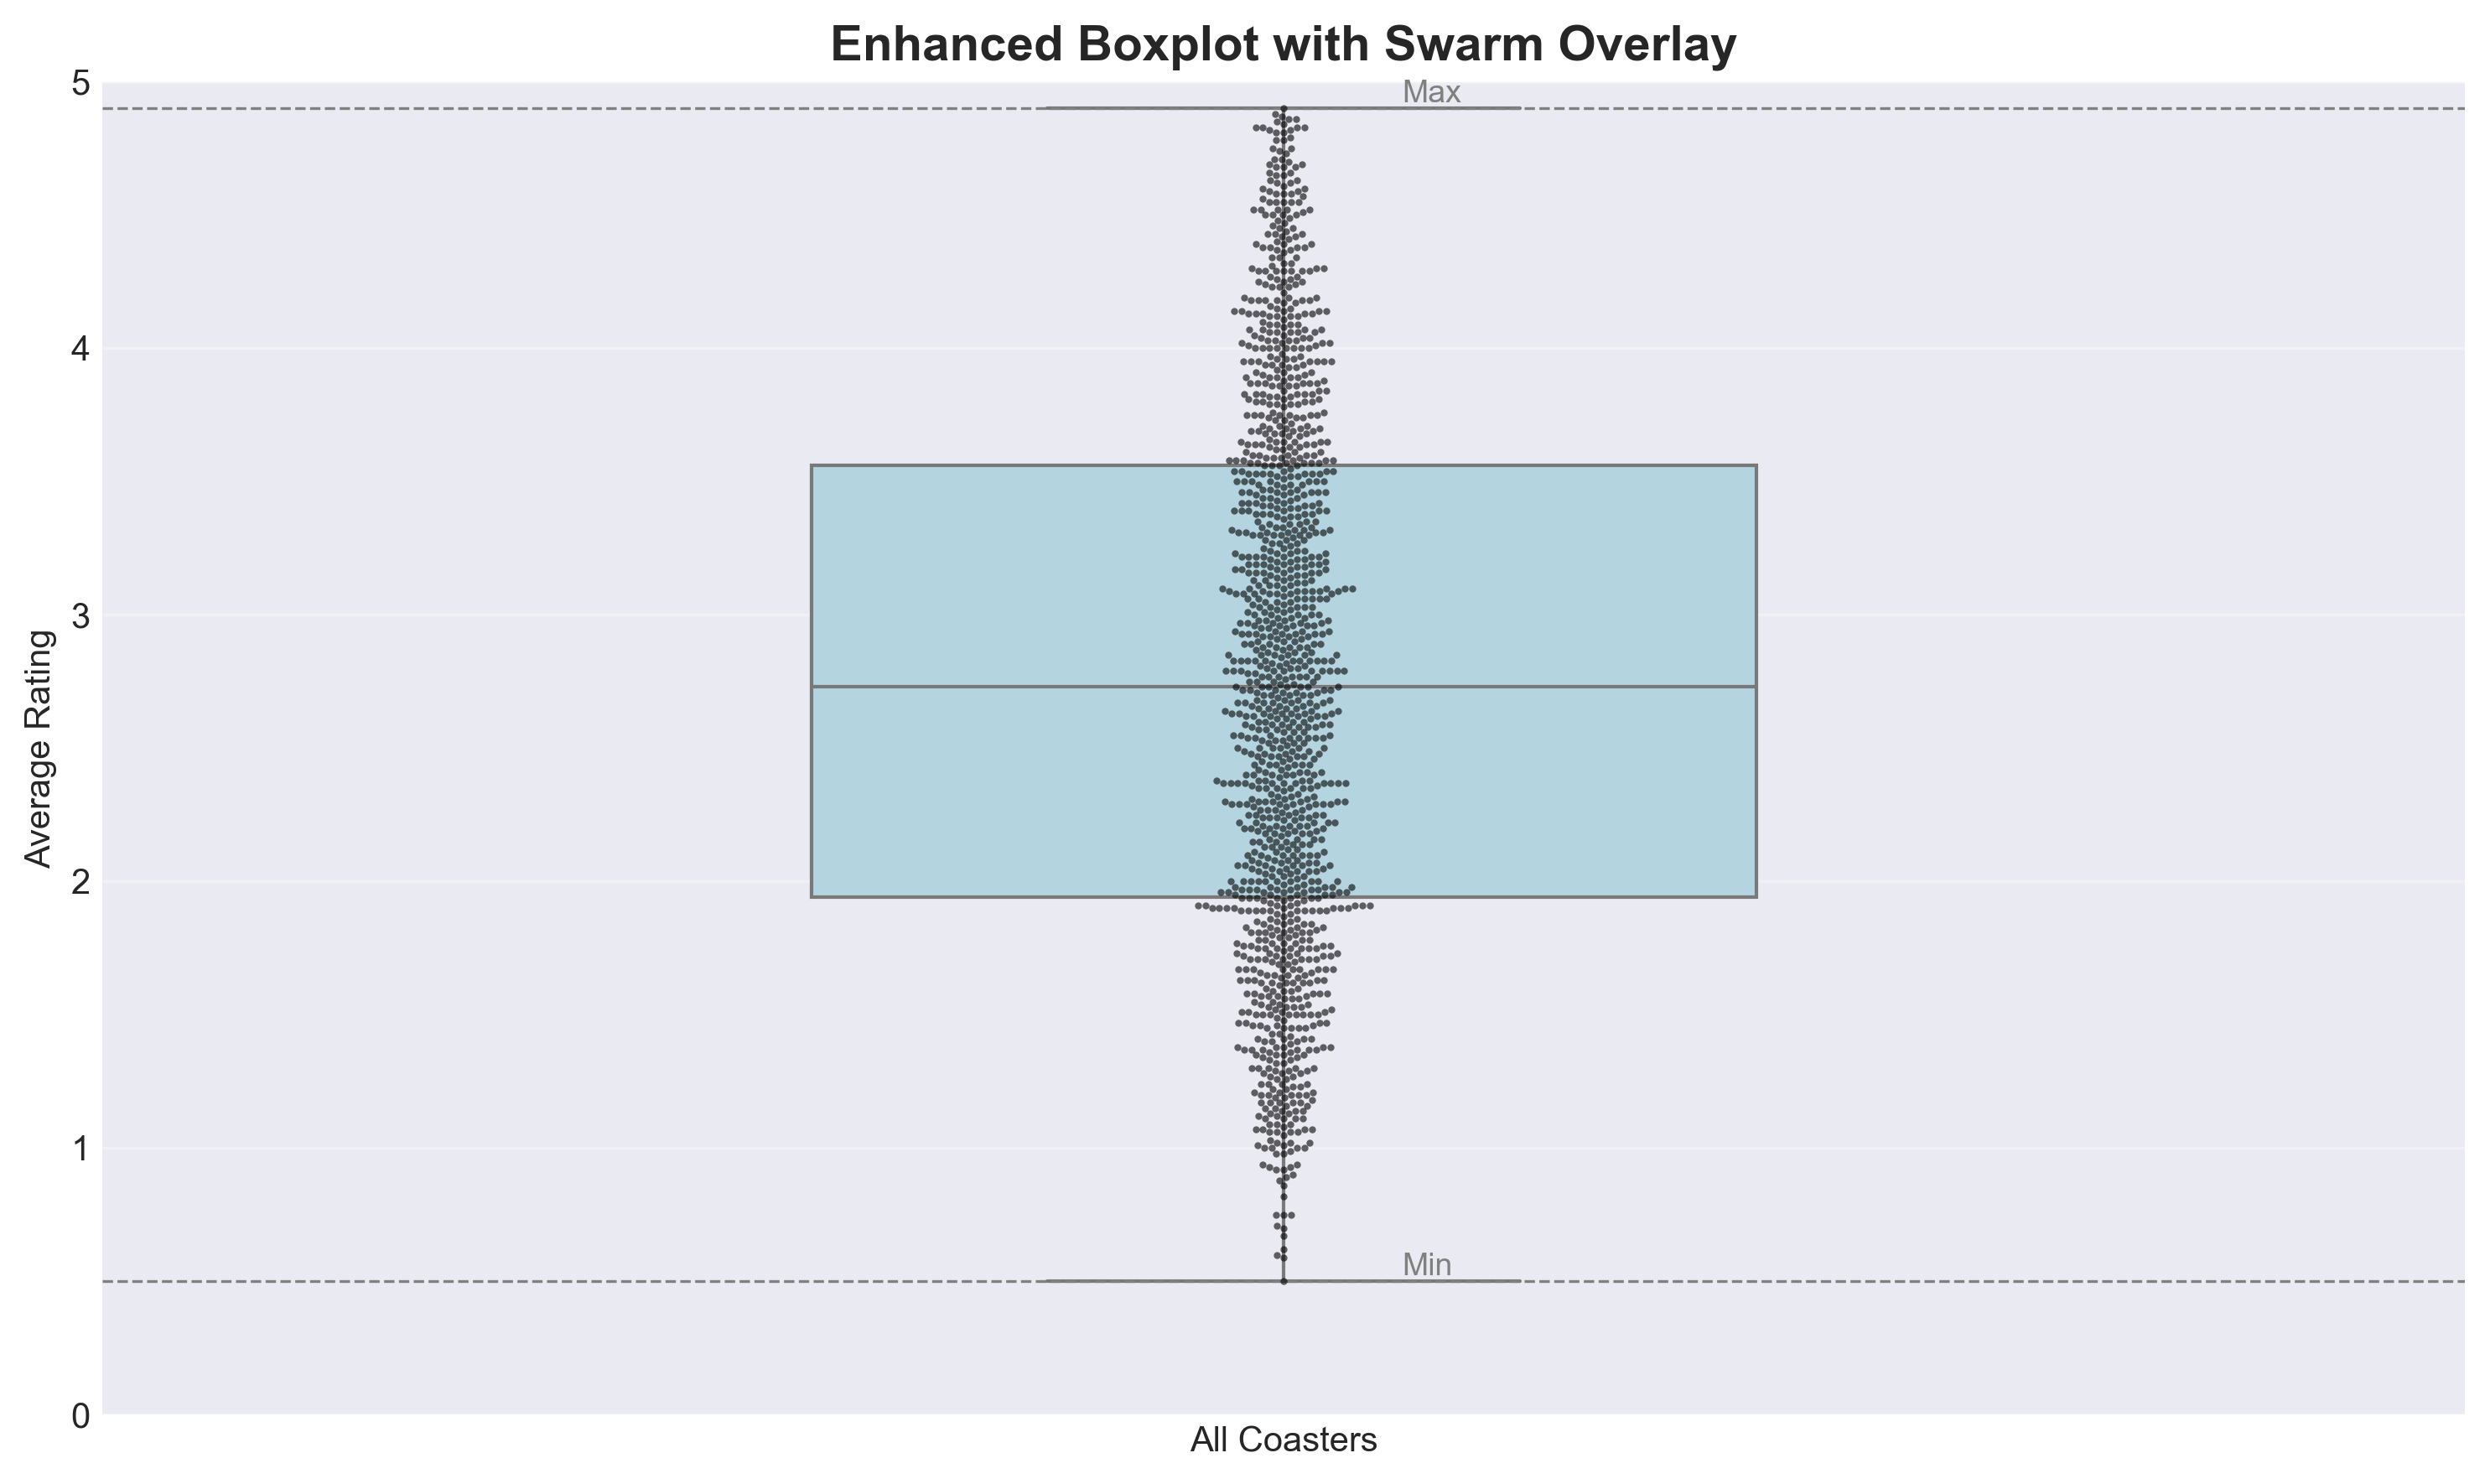

✓ Enhanced boxplot rendered


In [75]:
# Enhanced boxplot with category overlays and swarm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=np.repeat('All Coasters', len(df)), y=df['avg_rating'], ax=ax, color='#ADD8E6', width=0.4)
sns.swarmplot(x=np.repeat('All Coasters', len(df)), y=df['avg_rating'], ax=ax, size=2, color='black', alpha=0.6)

# Annotate quartiles and whiskers
q1, q2, q3 = np.percentile(df['avg_rating'], [25, 50, 75])
min_v, max_v = df['avg_rating'].min(), df['avg_rating'].max()
for val, label in [(q1,'Q1'),(q2,'Median'),(q3,'Q3'),(min_v,'Min'),(max_v,'Max')]:
    ax.axhline(val, color='gray', linestyle='--', linewidth=0.8)
    ax.text(0.05, val, label, va='bottom', ha='left', fontsize=9, color='gray')

ax.set_title('Enhanced Boxplot with Swarm Overlay', fontsize=14, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Average Rating')
ax.set_ylim([0, 5])
ax.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print('✓ Enhanced boxplot rendered')

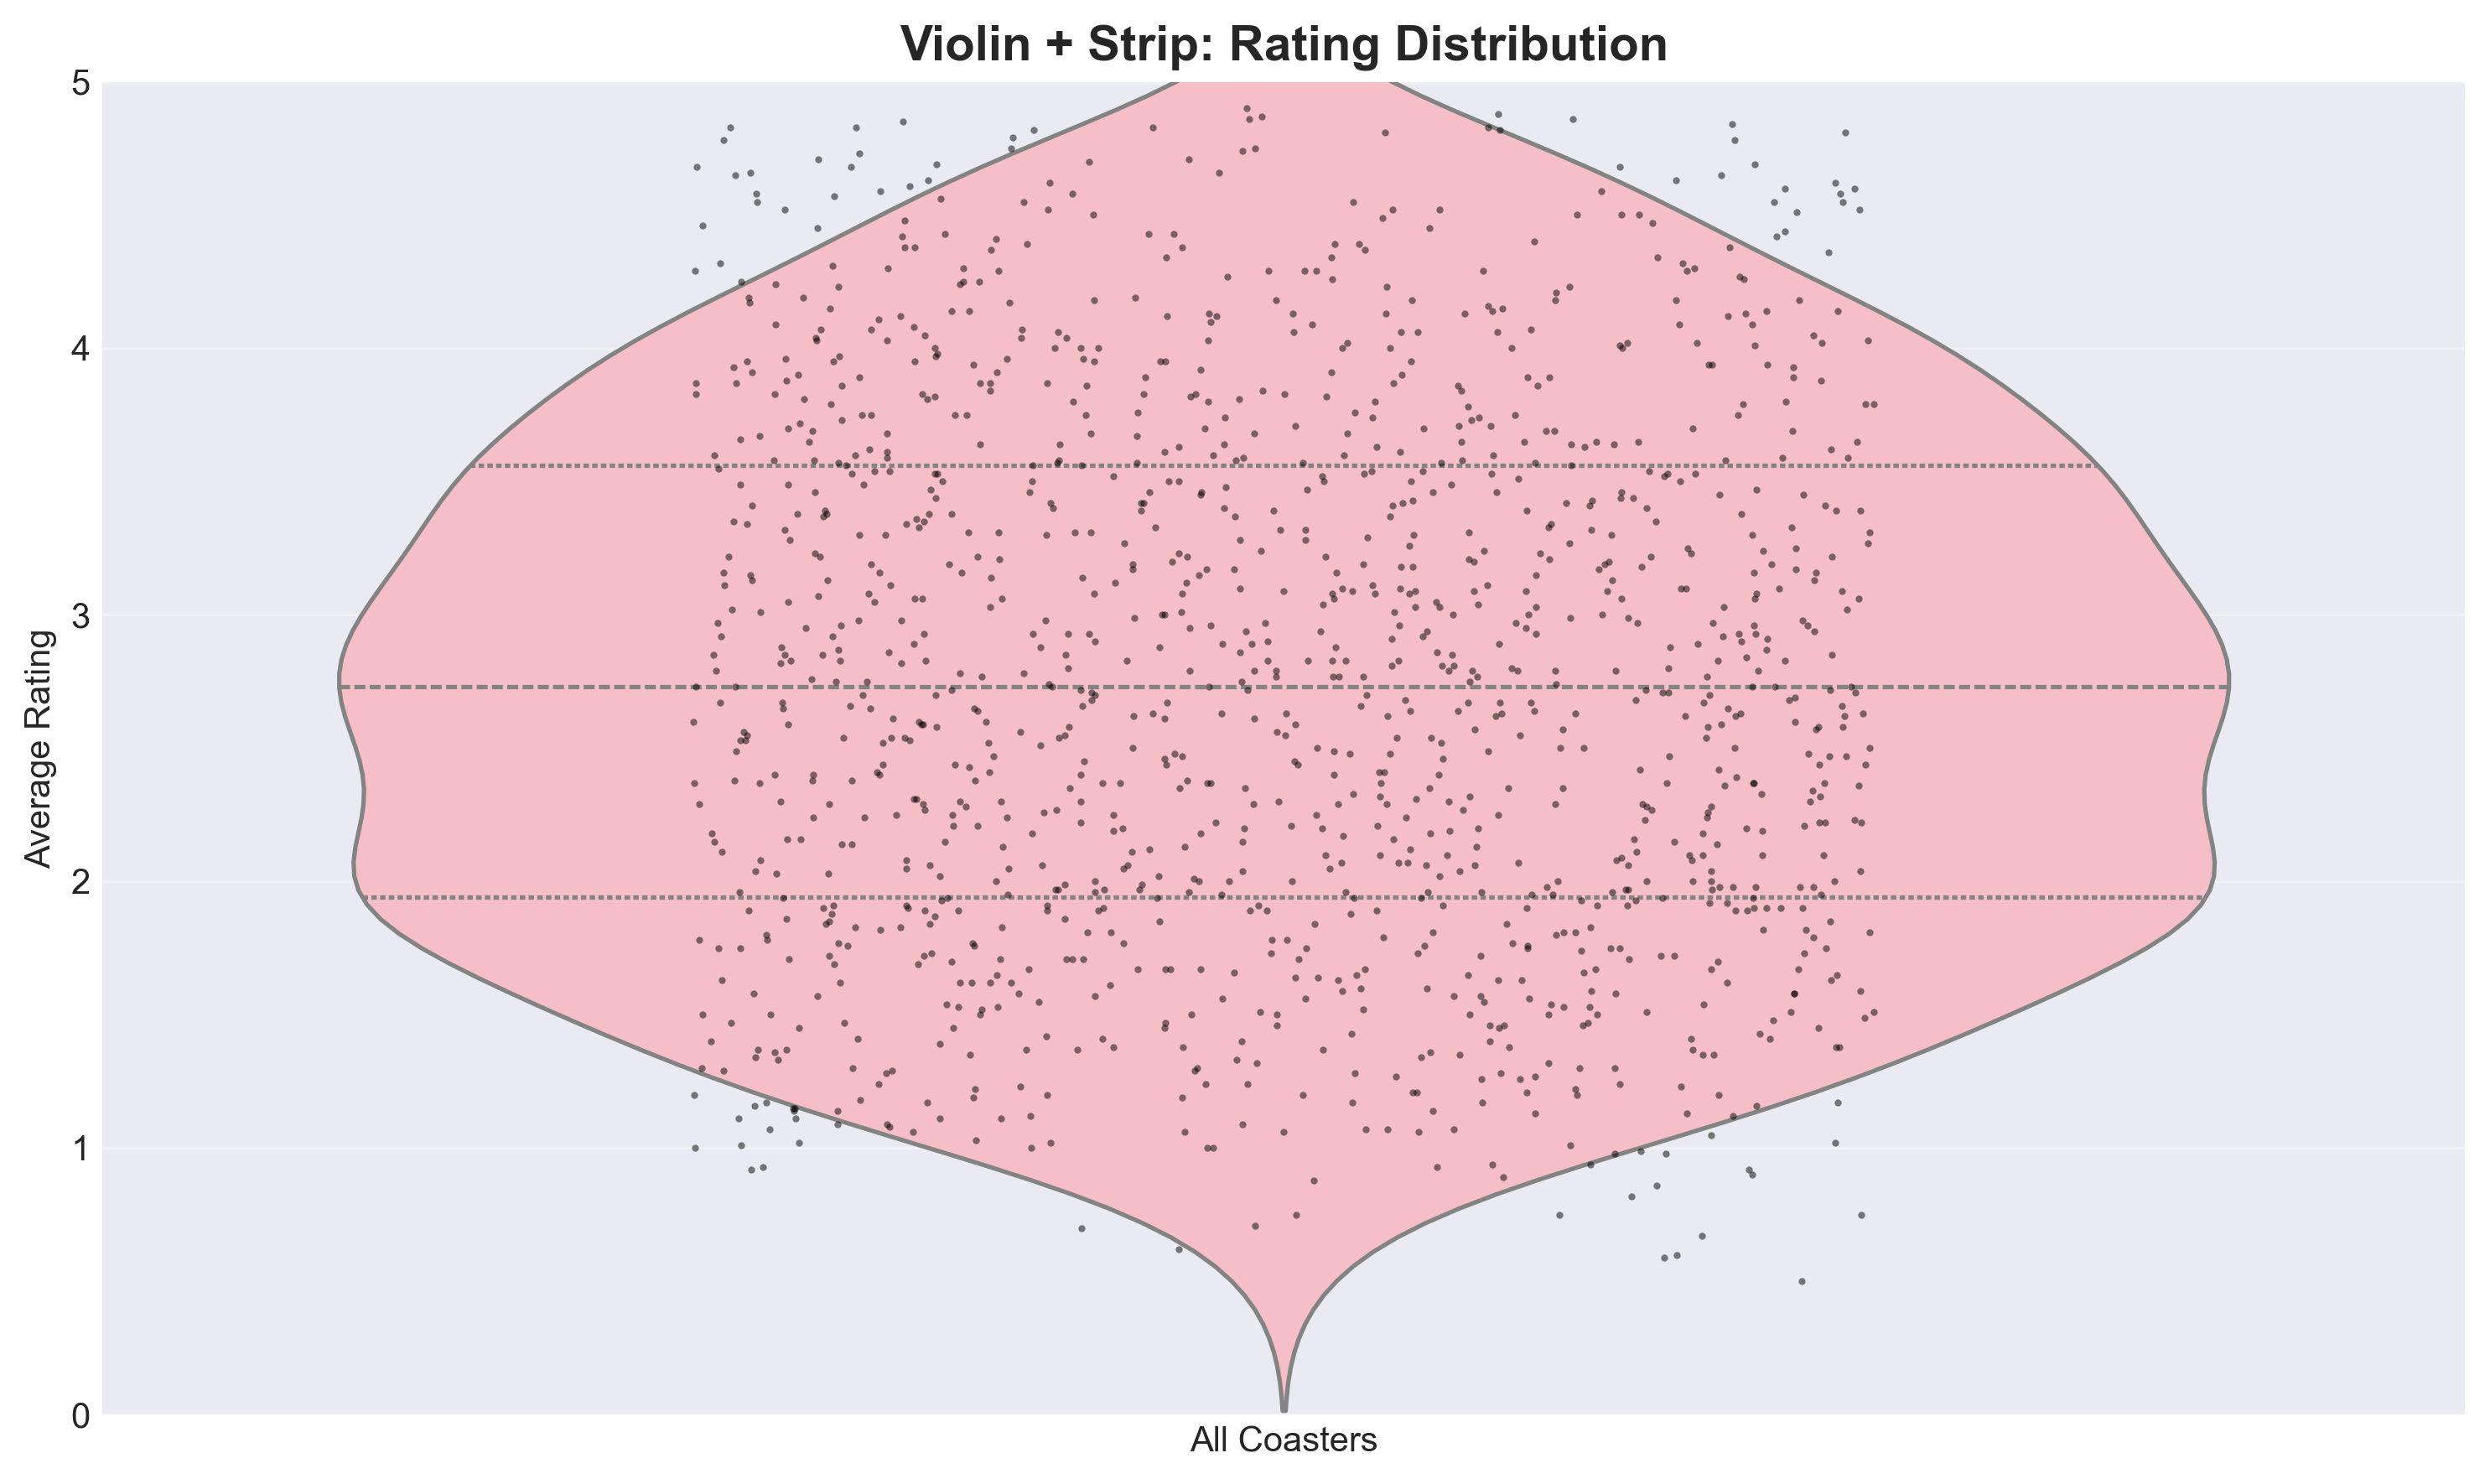

✓ Violin + strip rendered


In [76]:
# Violin + strip composite for rating distribution
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x=np.repeat('All Coasters', len(df)), y=df['avg_rating'], ax=ax, inner='quartile', color='#FFB6C1')
sns.stripplot(x=np.repeat('All Coasters', len(df)), y=df['avg_rating'], ax=ax, jitter=0.25, size=2, color='black', alpha=0.5)
ax.set_title('Violin + Strip: Rating Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Average Rating')
ax.set_ylim([0, 5])
ax.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print('✓ Violin + strip rendered')

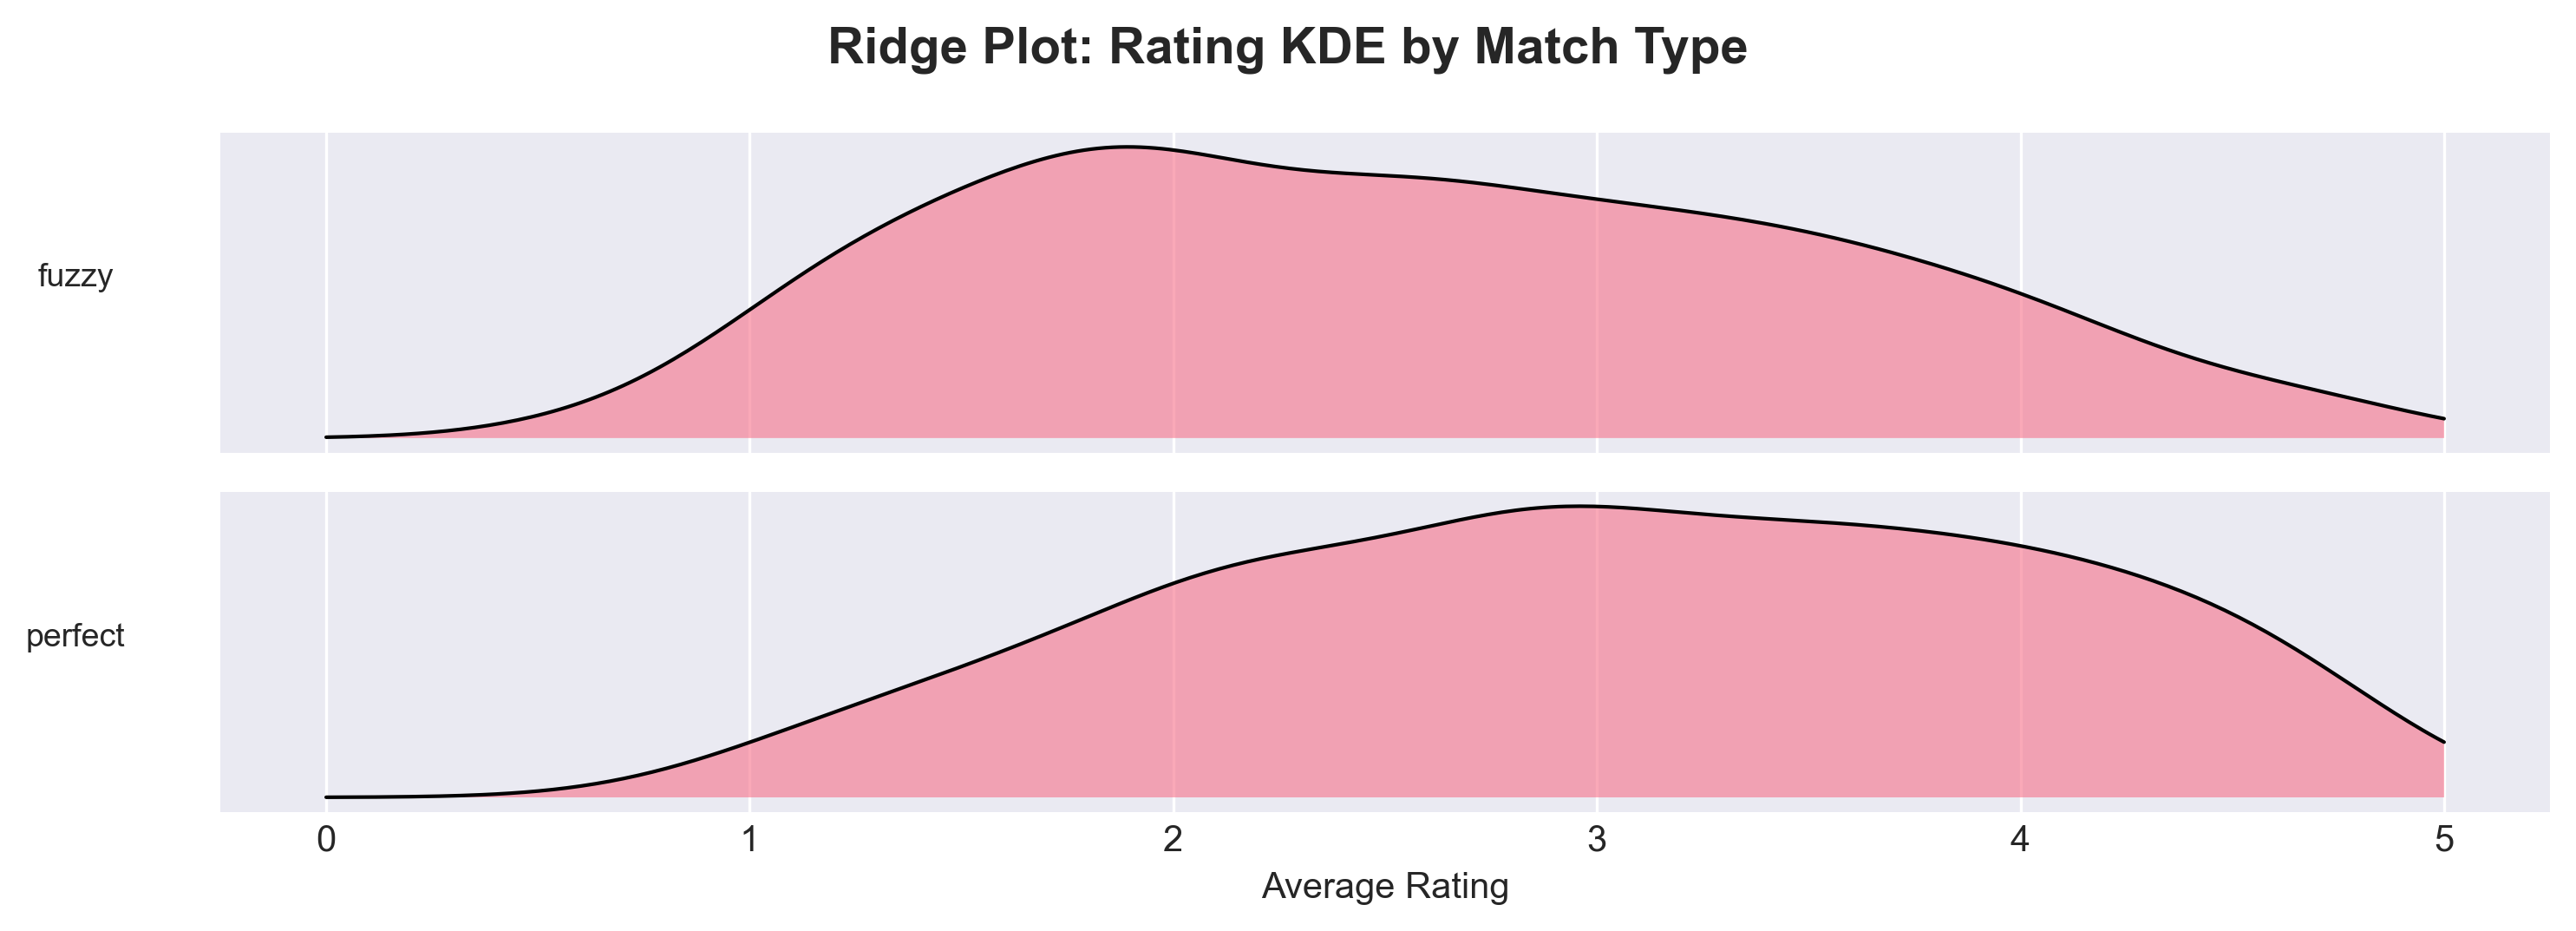

In [77]:
# Ridge plot (joy plot) of ratings by binned match type (if available)
import numpy as np
import matplotlib.pyplot as plt

if 'match_type' in df.columns:
    groups = df['match_type'].unique()
    fig, axes = plt.subplots(len(groups), 1, figsize=(10, 1.8*len(groups)), sharex=True)
    x = np.linspace(0, 5, 300)
    for i, g in enumerate(sorted(groups)):
        data = df[df['match_type'] == g]['avg_rating'].dropna()
        if len(data) < 10:
            axes[i].text(0.5, 0.5, f'Insufficient data: {g}', transform=axes[i].transAxes, ha='center')
            axes[i].axis('off')
            continue
        from scipy.stats import gaussian_kde
        kde = gaussian_kde(data)
        y = kde(x)
        y = y / y.max()  # normalize for stacked view
        axes[i].fill_between(x, y + i*0.8, i*0.8, alpha=0.6)
        axes[i].plot(x, y + i*0.8, color='black', linewidth=1)
        axes[i].set_yticks([])
        axes[i].set_ylabel(g, rotation=0, labelpad=40, fontsize=9)
    axes[-1].set_xlabel('Average Rating')
    fig.suptitle('Ridge Plot: Rating KDE by Match Type', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print('No match_type column; skipping ridge plot.')

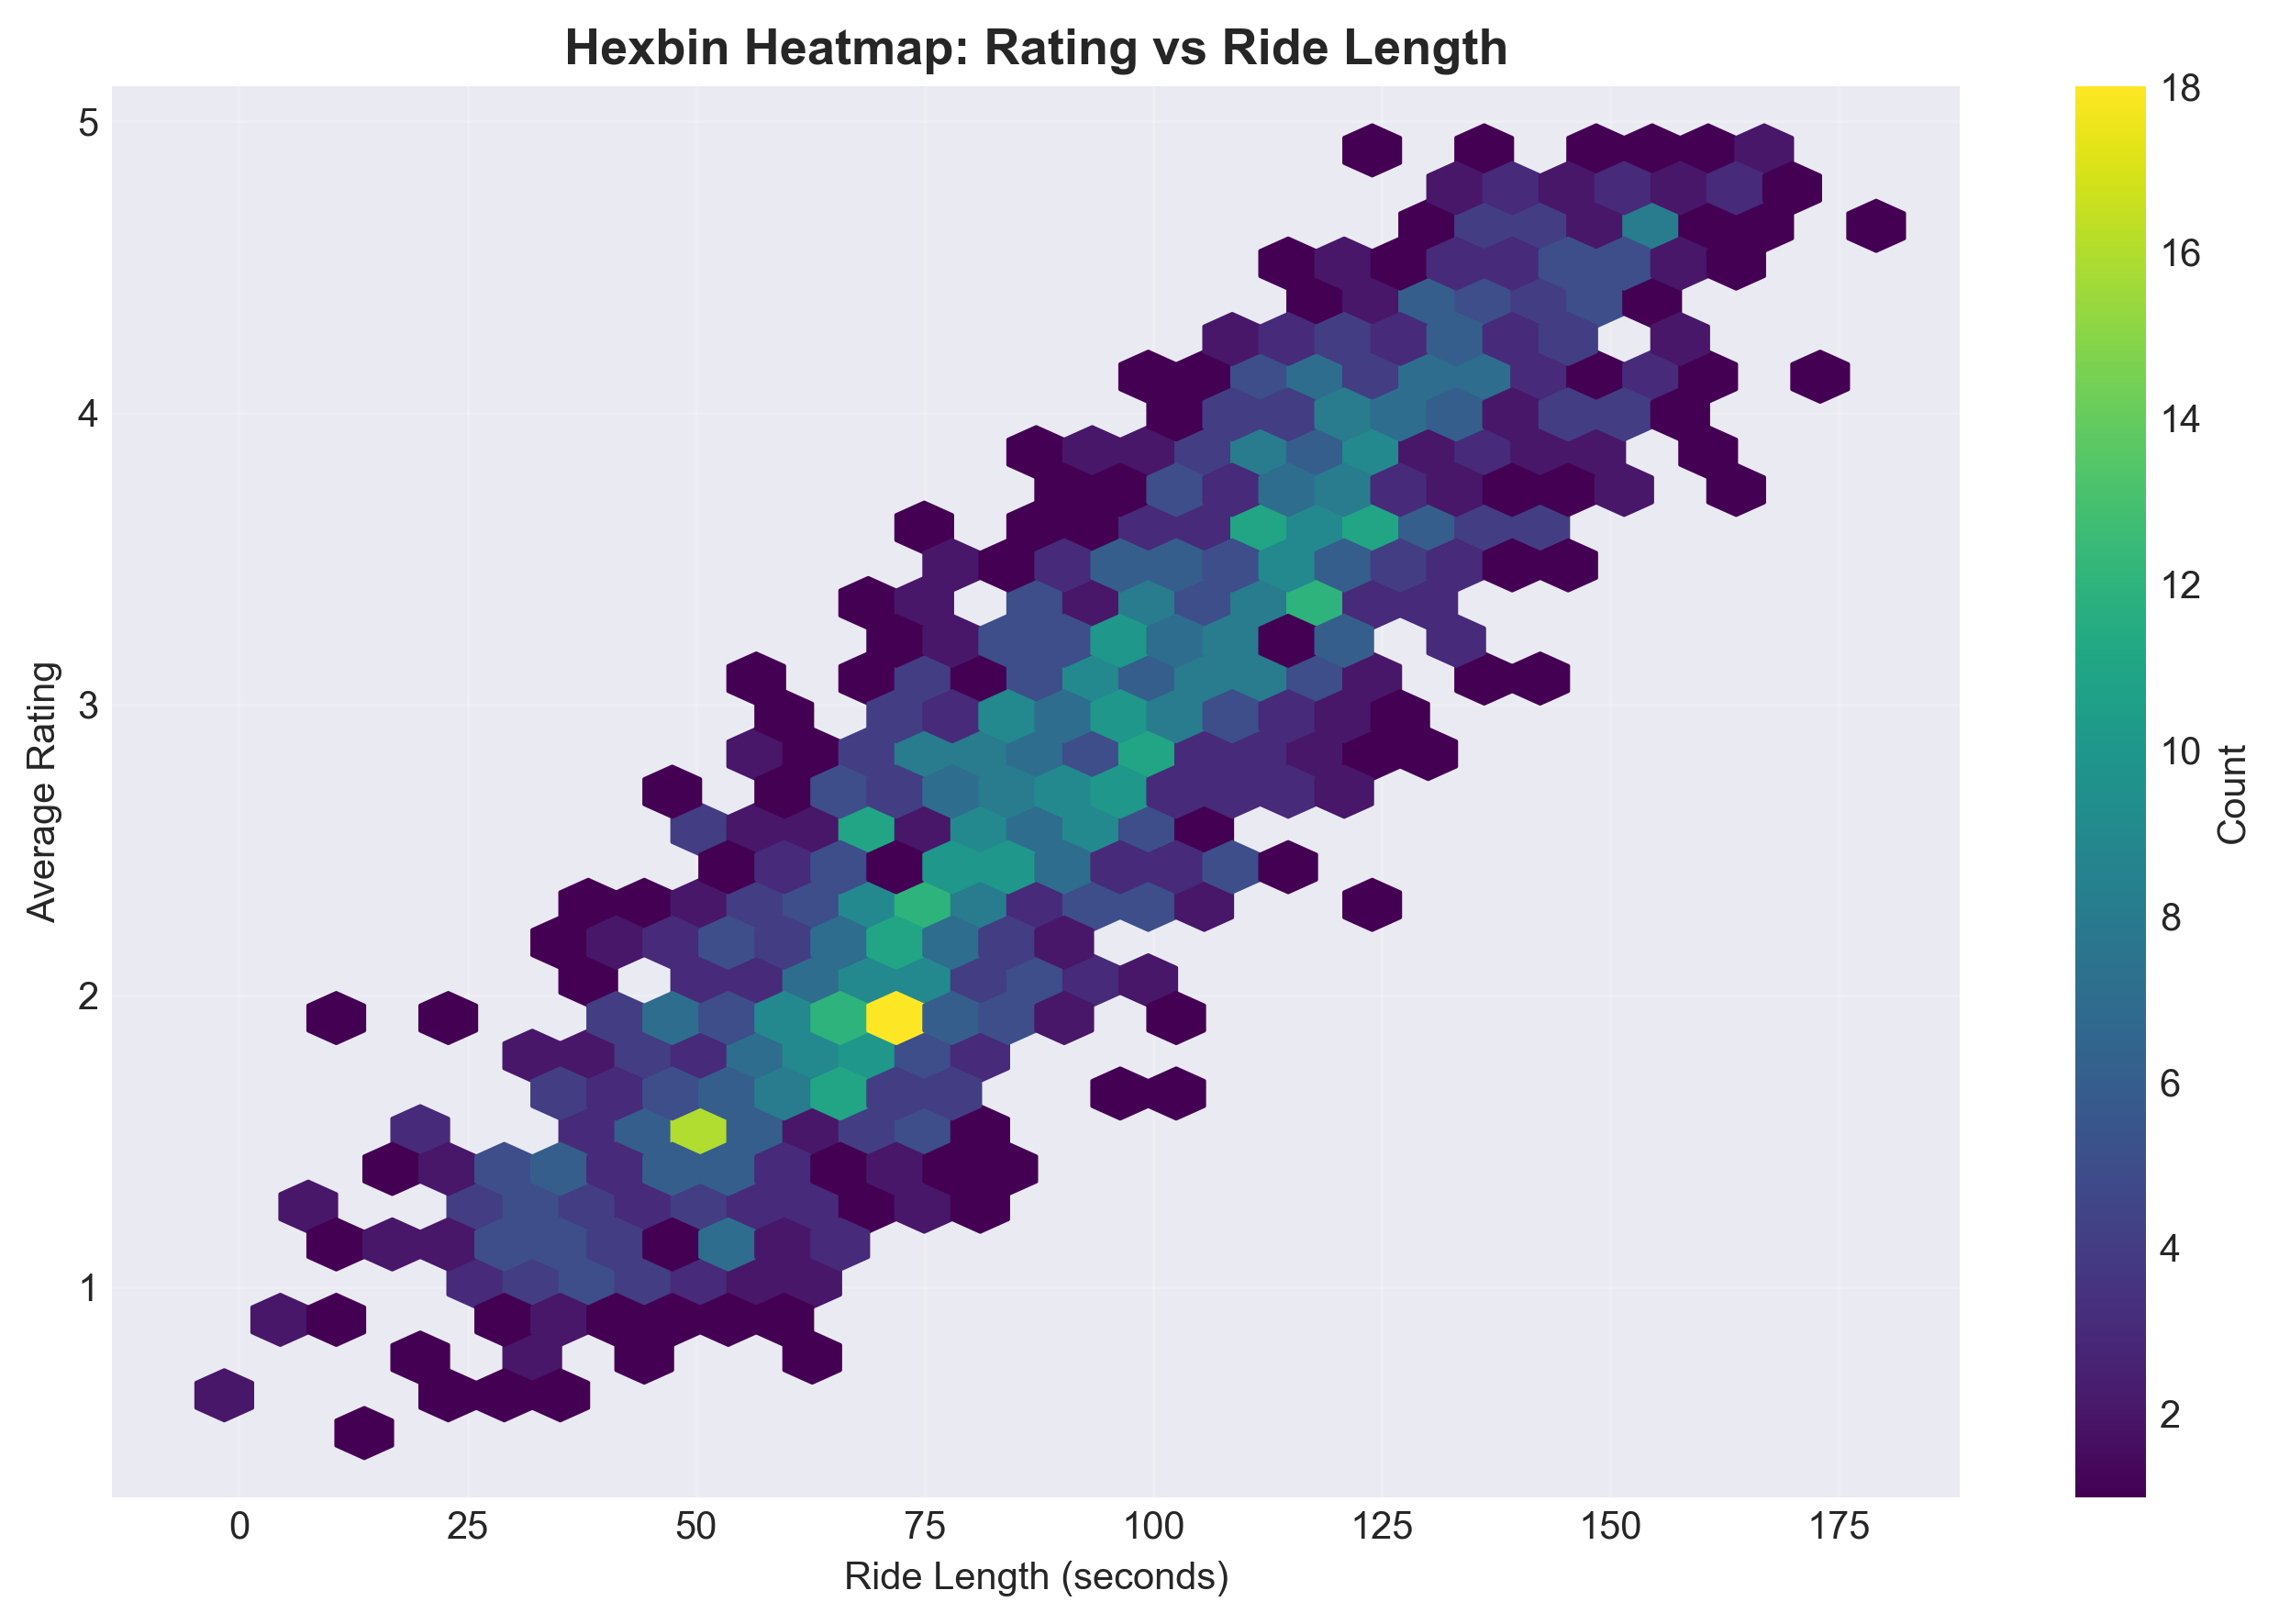

✓ Hexbin heatmap rendered


In [78]:
# Hexbin heatmap: ratings vs. (simulated) ride length if available
import matplotlib.pyplot as plt
import numpy as np

# If ride_length exists, use it; else simulate based on avg_rating variance for demo
if 'ride_length' in df.columns:
    length = df['ride_length'].to_numpy()
else:
    rng = np.random.default_rng(42)
    length = rng.normal(loc=90 + 30*(df['avg_rating']-df['avg_rating'].mean()), scale=15, size=len(df))

fig, ax = plt.subplots(figsize=(9, 6))
hb = ax.hexbin(length, df['avg_rating'], gridsize=30, cmap='viridis', mincnt=1)
ax.set_xlabel('Ride Length (seconds)')
ax.set_ylabel('Average Rating')
ax.set_title('Hexbin Heatmap: Rating vs Ride Length', fontsize=13, fontweight='bold')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Count')
ax.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

print('✓ Hexbin heatmap rendered')

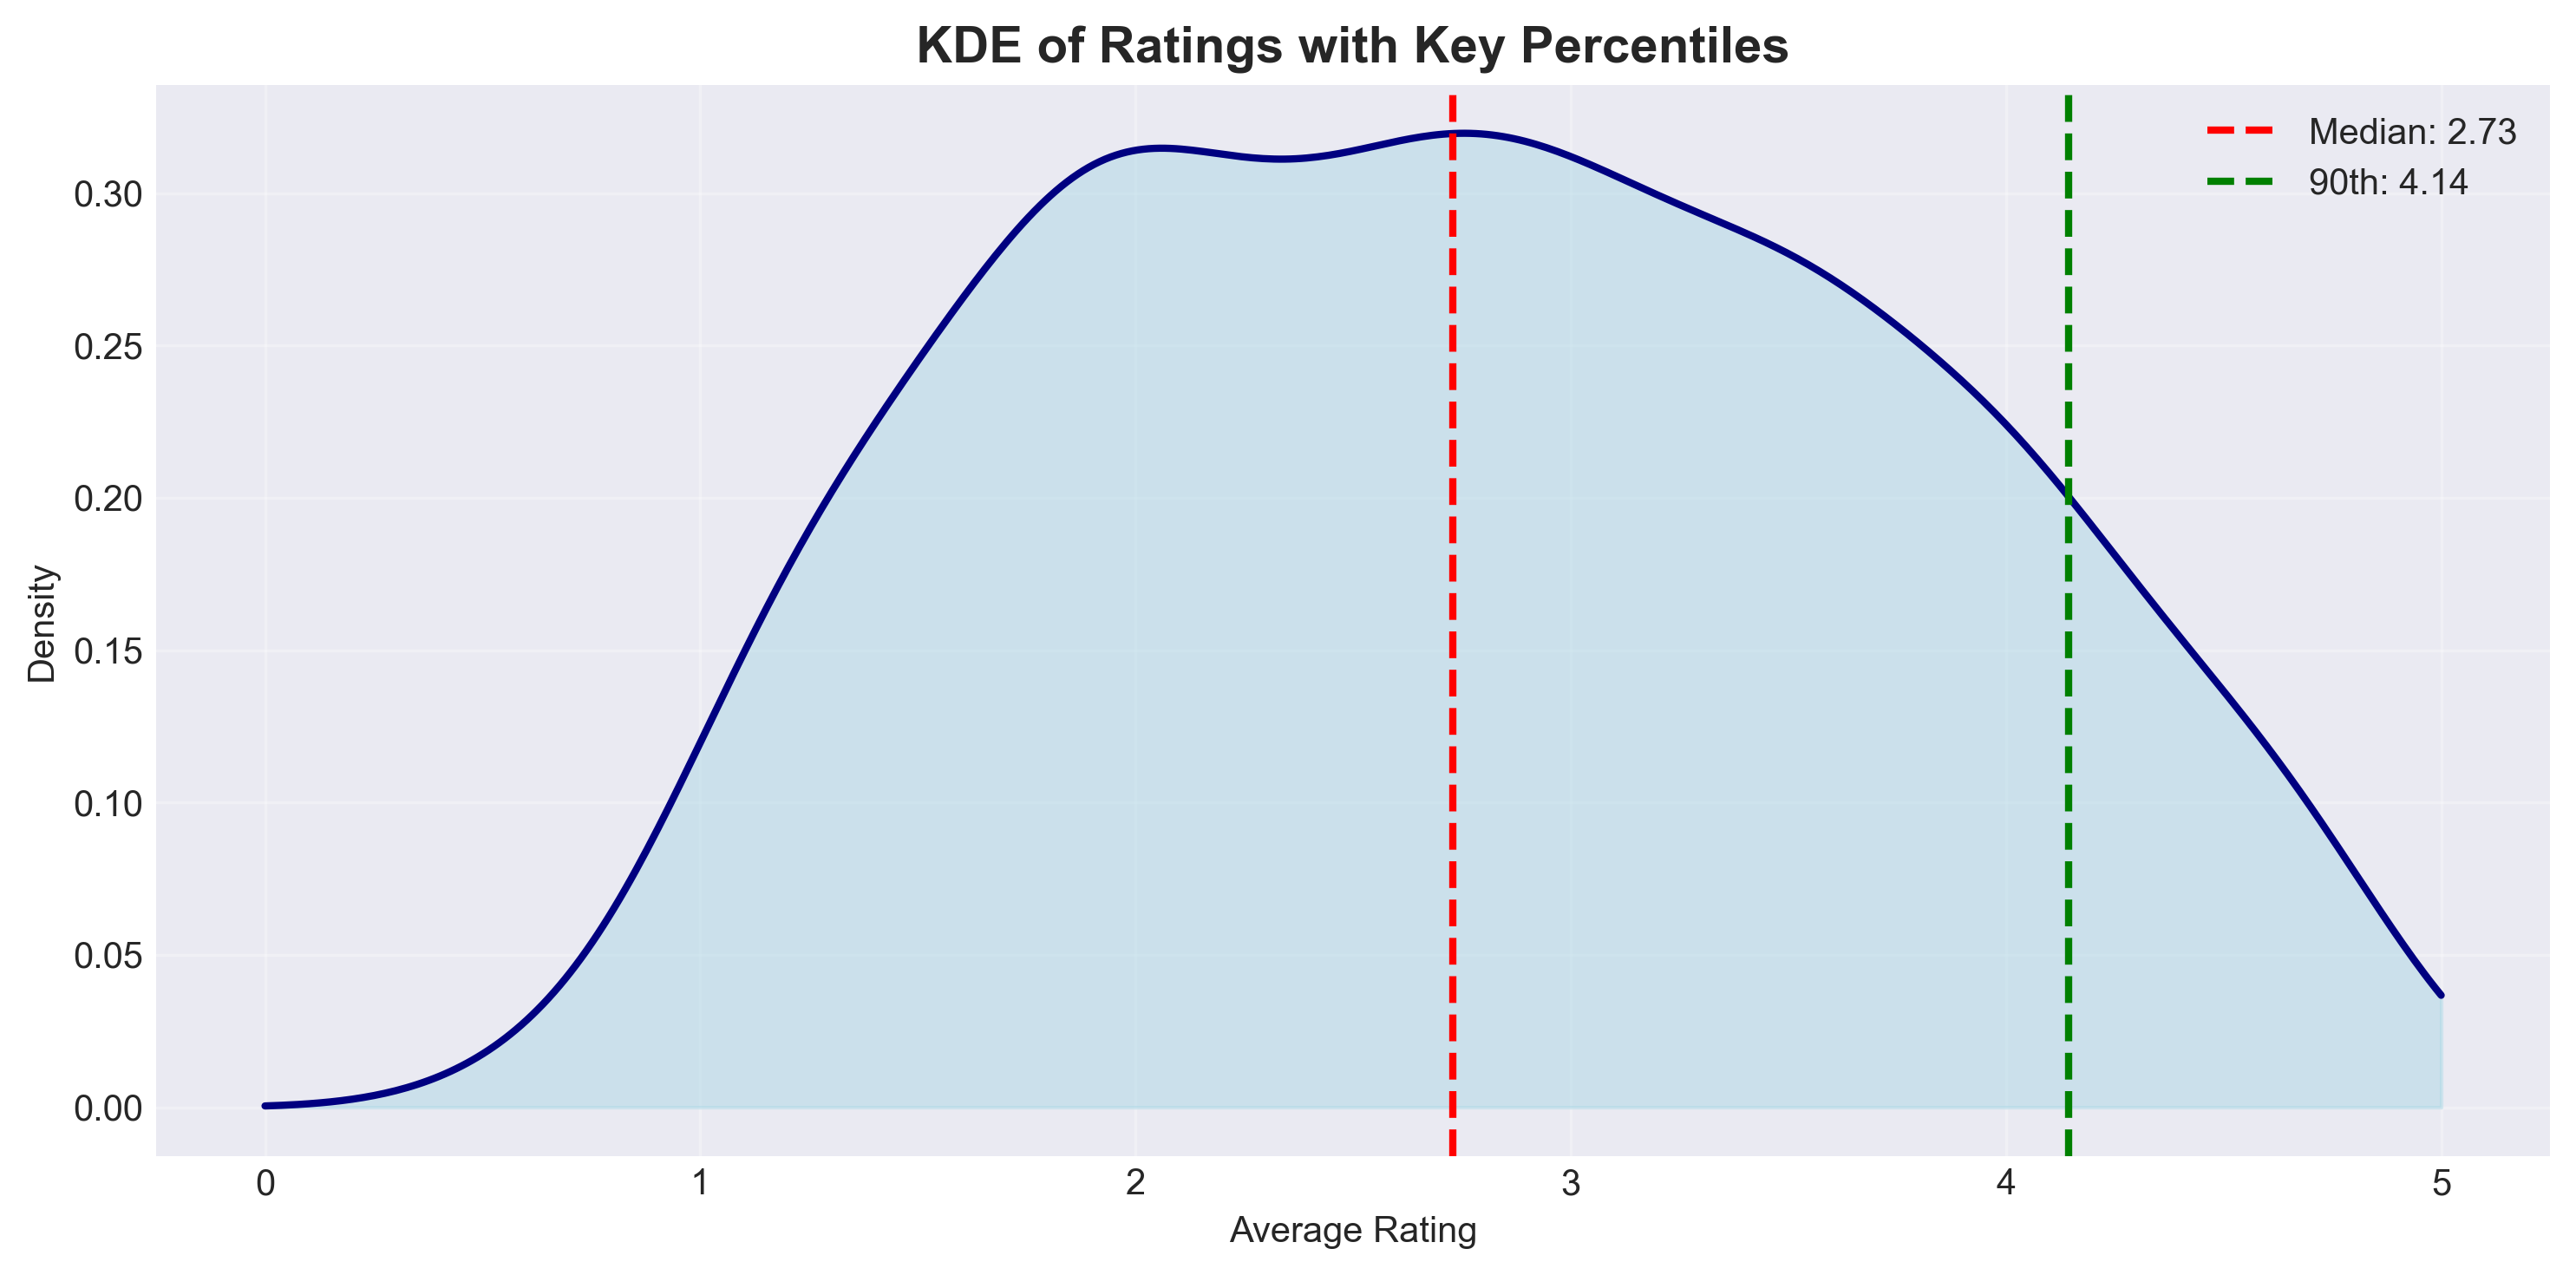

✓ KDE plot rendered


In [79]:
# KDE + annotations: highlight median and top percentile
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

ratings = df['avg_rating'].dropna().to_numpy()
x = np.linspace(0, 5, 400)
kde = gaussian_kde(ratings)
y = kde(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, color='navy', linewidth=2)
ax.fill_between(x, y, color='lightblue', alpha=0.5)

median = np.median(ratings)
p90 = np.percentile(ratings, 90)
ax.axvline(median, color='red', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')
ax.axvline(p90, color='green', linestyle='--', linewidth=2, label=f'90th: {p90:.2f}')
ax.legend()
ax.set_title('KDE of Ratings with Key Percentiles', fontsize=14, fontweight='bold')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Density')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print('✓ KDE plot rendered')